<a href="https://colab.research.google.com/github/hyrahmaaa/Belajar-Penerapan-Data-Science-2/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Rahayu Nur Rahmawati
- Email: a229xbm406@devacademy.id
- Id Dicoding: A229XBM406

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as ols
import statsmodels.api as sm
from google.colab import files
import joblib
import io

from scipy.stats import chi2_contingency
from itertools import combinations
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from google.colab import drive

### Menyiapkan data yang akan digunakan

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Tentukan path file dataset Anda di Google Drive
path_file = '/content/drive/MyDrive/LASKAR AI/SUBMISSION/data.csv'

In [4]:
# Baca dataset menggunakan pandas
df = pd.read_csv(path_file, sep=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

### Kolom (fitur) dalam dataset

In [5]:
df.shape

(4424, 37)

Diperoleh bahwa ukuran datanya adalah 4.424 data dengan 37 kolom.

In [6]:
df.columns.tolist()

['Marital_status',
 'Application_mode',
 'Application_order',
 'Course',
 'Daytime_evening_attendance',
 'Previous_qualification',
 'Previous_qualification_grade',
 'Nacionality',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Admission_grade',
 'Displaced',
 'Educational_special_needs',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'Age_at_enrollment',
 'International',
 'Curricular_units_1st_sem_credited',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_without_evaluations',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP',
 'Status']

**DESKRIPSI VARIABEL**

*  Marital status : The marital status of the student. (Categorical)
   - 1-single
   - 2-married
   - 3-widower
   - 4-divorced
   - 5-facto union
   - 6-legally separated.

*  Application mode : The method of application used by the student. (Categorical)
   - 1 - 1st phase - general contingent
   - 2 - Ordinance No. 612/93
   - 5 - 1st phase - special contingent (Azores Island)
   - 7 - Holders of other higher courses
   - 10 - Ordinance No. 854-B/99
   - 15 - International student (bachelor)
   - 16 - 1st phase - special contingent (Madeira Island)
   - 17 - 2nd phase - general contingent
   - 18 - 3rd phase - general contingent
   - 26 - Ordinance No. 533-A/99, item b2) (Different Plan)
   - 27 - Ordinance No. 533-A/99, item b3 (Other Institution)
   - 39 - Over 23 years old
   - 42 - Transfer
   - 43 - Change of course
   - 44 - Technological specialization diploma holders
   - 51 - Change of institution/course
   - 53 - Short cycle diploma holders
   - 57 - Change of institution/course (International)

*  Application order : The order in which the student applied. (Numerical) Application order (between 0 - first choice; and 9 last choice)

*  Course : The course taken by the student. (Categorical)
   - 33 - Biofuel Production Technologies
   - 171 - Animation and Multimedia Design
   - 8014 - Social Service (evening attendance)
   - 9003 - Agronomy 9070 - Communication Design
   - 9085 - Veterinary Nursing
   - 9119 - Informatics Engineering
   - 9130 - Equinculture
   - 9147 - Management
   - 9238 - Social Service
   - 9254 - Tourism
   - 9500 - Nursing
   - 9556 - Oral Hygiene
   - 9670 - Advertising and Marketing Management
   - 9773 - Journalism and Communication
   - 9853 - Basic Education
   - 9991 - Management (evening attendance)

*  Daytime/evening attendance : Whether the student attends classes during the day or in the evening. (Categorical)
   - 1 - daytime
   - 0 - evening

*  Previous qualification : The qualification obtained by the student before enrolling in higher education. (Categorical)
   - 1 - Secondary education
   - 2 - Higher education - bachelor's degree
   - 3 - Higher education - degree
   - 4 - Higher education - master's
   - 5 - Higher education - doctorate
   - 6 - Frequency of higher education
   - 9 - 12th year of schooling - not completed
   - 10 - 11th year of schooling - not completed
   - 12 - Other - 11th year of schooling
   - 14 - 10th year of schooling
   - 15 - 10th year of schooling - not completed
   - 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv.
   - 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv.
   - 39 - Technological specialization course
   - 40 - Higher education - degree (1st cycle)
   - 42 - Professional higher technical course
   - 43 - Higher education - master (2nd cycle)

*  Previous qualification (grade) : Grade of previous qualification (between 0 and 200)

*  Nacionality : The nationality of the student. (Categorical)
   - 1 - Portuguese;
   - 2 - German;
   - 6 - Spanish;
   - 11 - Italian;
   - 13 - Dutch;
   - 14 - English;
   - 17 - Lithuanian;
   - 21 - Angolan;
   - 22 - Cape Verdean;
   - 24 - Guinean;
   - 25 - Mozambican;
   - 26 - Santomean;
   - 32 - Turkish;
   - 41 - Brazilian;
   - 62 - Romanian;
   - 100 - Moldova (Republic of);
   - 101 - Mexican;
   - 103 - Ukrainian;
   - 105 - Russian;
   - 108 - Cuban;
   - 109 - Colombian

*  Mother's qualification : The qualification of the student's mother. (Categorical)
   - 1 - Secondary Education - 12th Year of Schooling or Eq.
   - 2 - Higher Education - Bachelor's Degree
   - 3 - Higher Education - Degree
   - 4 - Higher Education - Master's
   - 5 - Higher Education - Doctorate
   - 6 - Frequency of Higher Education
   - 9 - 12th Year of Schooling - Not Completed
   - 10 - 11th Year of Schooling - Not Completed
   - 11 - 7th Year (Old)
   - 12 - Other - 11th Year of Schooling
   - 14 - 10th Year of Schooling
   - 18 - General commerce course
   - 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
   - 22 - Technical-professional course
   - 26 - 7th year of schooling
   - 27 - 2nd cycle of the general high school course
   - 29 - 9th Year of Schooling - Not Completed
   - 30 - 8th year of schooling
   - 34 - Unknown
   - 35 - Can't read or write
   - 36 - Can read without having a 4th year of schooling
   - 37 - Basic education 1st cycle (4th/5th year) or equiv.
   - 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
   - 39 - Technological specialization course
   - 40 - Higher education - degree (1st cycle)
   - 41 - Specialized higher studies course
   - 42 - Professional higher technical course
   - 43 - Higher Education - Master (2nd cycle)
   - 44 - Higher Education - Doctorate (3rd cycle)

*  Father's qualification : The qualification of the student's father. (Categorical)
    - 1 - Secondary Education - 12th Year of Schooling or Eq.
    - 2 - Higher Education - Bachelor's Degree
    - 3 - Higher Education - Degree
    - 4 - Higher Education - Master's
    - 5 - Higher Education - Doctorate
    - 6 - Frequency of Higher Education
    - 9 - 12th Year of Schooling - Not Completed
    - 10 - 11th Year of Schooling - Not Completed
    - 11 - 7th Year (Old)
    - 12 - Other - 11th Year of Schooling
    - 13 - 2nd year complementary high school course
    - 14 - 10th Year of Schooling
    - 18 - General commerce course
    - 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
    - 20 - Complementary High School Course
    - 22 - Technical-professional course
    - 25 - Complementary High School Course - not concluded
    - 26 - 7th year of schooling
    - 27 - 2nd cycle of the general high school course
    - 29 - 9th Year of Schooling - Not Completed
    - 30 - 8th year of schooling
    - 31 - General Course of Administration and Commerce
    - 33 - Supplementary Accounting and Administration
    - 34 - Unknown
    - 35 - Can't read or write
    - 36 - Can read without having a 4th year of schooling
    - 37 - Basic education 1st cycle (4th/5th year) or equiv.
    - 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
    - 39 - Technological specialization course
    - 40 - Higher education - degree (1st cycle)
    - 41 - Specialized higher studies course
    - 42 - Professional higher technical course
    - 43 - Higher Education - Master (2nd cycle)
    - 44 - Higher Education - Doctorate (3rd cycle)

*  Mother's occupation: The occupation of the student's mother. (Categorical)
    - 0 - Student
    - 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers
    - 2 - Specialists in Intellectual and Scientific Activities
    - 3 - Intermediate Level Technicians and Professions
    - 4 - Administrative staff
    - 5 - Personal Services, Security and Safety Workers and Sellers
    - 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry
    - 7 - Skilled Workers in Industry, Construction and Craftsmen
    - 8 - Installation and Machine Operators and Assembly Workers
    - 9 - Unskilled Workers
    - 10 - Armed Forces Professions
    - 90 - Other Situation
    - 99 - (blank)
    - 122 - Health professionals
    - 123 - teachers
    - 125 - Specialists in information and communication technologies (ICT)
    - 131 - Intermediate level science and engineering technicians and professions
    - 132 - Technicians and professionals, of intermediate level of health
    - 134 - Intermediate level technicians from legal, social, sports, cultural and similar services
    - 141 - Office workers, secretaries in general and data processing operators
    - 143 - Data, accounting, statistical, financial services and registry-related operators
    - 144 - Other administrative support staff
    - 151 - personal service workers
    - 152 - sellers
    - 153 - Personal care workers and the like
    - 171 - Skilled construction workers and the like, except electricians
    - 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like
    - 175 - Workers in food processing, woodworking, clothing and other industries and crafts
    - 191 - cleaning workers
    - 192 - Unskilled workers in agriculture, animal production, fisheries and forestry
    - 193 - Unskilled workers in extractive industry, construction, manufacturing and transport
    - 194 - Meal preparation assistants

*  Father's occupation : The occupation of the student's father. (Categorical)  
    - 0 - Student
    - 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers
    - 2 - Specialists in Intellectual and Scientific Activities
    - 3 - Intermediate Level Technicians and Professions
    - 4 - Administrative staff
    - 5 - Personal Services, Security and Safety Workers and Sellers
    - 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry
    - 7 - Skilled Workers in Industry, Construction and Craftsmen
    - 8 - Installation and Machine Operators and Assembly Workers
    - 9 - Unskilled Workers
    - 10 - Armed Forces Professions
    - 90 - Other Situation
    - 99 - (blank)
    - 101 - Armed Forces Officers
    - 102 - Armed Forces Sergeants
    - 103 - Other Armed Forces personnel
    - 112 - Directors of administrative and commercial services
    - 114 - Hotel, catering, trade and other services directors
    - 121 - Specialists in the physical sciences, mathematics, engineering and related techniques
    - 122 - Health professionals
    - 123 - teachers
    - 124 - Specialists in finance, accounting, administrative organization, public and commercial relations
    - 131 - Intermediate level science and engineering technicians and professions
    - 132 - Technicians and professionals, of intermediate level of health
    - 134 - Intermediate level technicians from legal, social, sports, cultural and similar services
    - 135 - Information and communication technology technicians
    - 141 - Office workers, secretaries in general and data processing operators
    - 143 - Data, accounting, statistical, financial services and registry-related operators
    - 144 - Other administrative support staff
    - 151 - personal service workers
    - 152 - sellers
    - 153 - Personal care workers and the like
    - 154 - Protection and security services personnel
    - 161 - Market-oriented farmers and skilled agricultural and animal production workers
    - 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence
    - 171 - Skilled construction workers and the like, except electricians
    - 172 - Skilled workers in metallurgy, metalworking and similar
    - 174 - Skilled workers in electricity and electronics
    - 175 - Workers in food processing, woodworking, clothing and other industries and crafts
    - 181 - Fixed plant and machine operators
    - 182 - assembly workers
    - 183 - Vehicle drivers and mobile equipment operators
    - 192 - Unskilled workers in agriculture, animal production, fisheries and forestry
    - 193 - Unskilled workers in extractive industry, construction, manufacturing and transport
    - 194 - Meal preparation assistants
    - 195 - Street vendors (except food) and street service providers

*  Admission grade : Admission grade (between 0 and 200)

*  Displaced : Whether the student is a displaced person. (Categorical)
    - 1-yes
    - 0-no

*  Educational special needs : Whether the student has any special educational needs. (Categorical)
    - 1-yes
    - 0-no

*  Debtor : Whether the student is a debtor. (Categorical)
    - 1-yes
    - 0-no

*  Tuition fees up to date : Whether the student's tuition fees are up to date. (Categorical)
    - 1-yes
    - 0-no

*  Gender : The gender of the student. (Categorical)
    - 1-male
    - 0-female

*  Scholarship holder : Whether the student is a scholarship holder. (Categorical)
    - 1-yes
    - 0-no

*  Age at enrollment : The age of the student at the time of enrollment. (Numerical)

*  International : Whether the student is an international student. (Categorical)
    - 1-yes
    - 0-no

*  Curricular units 1st sem (credited) : The number of curricular units credited by the student in the first semester. (Numerical)

*  Curricular units 1st sem (enrolled) : The number of curricular units enrolled by the student in the first semester. (Numerical)

*  Curricular units 1st sem (evaluations) : The number of curricular units evaluated by the student in the first semester. (Numerical)

*  Curricular units 1st sem (approved) : The number of curricular units approved by the student in the first semester. (Numerical)

*  Curricular_units_1st_sem_grade : The number of curricular units approved by the student in the first semester. (Numerical)

*  Curricular_units_1st_sem_without_evaluations : The number of curricular units approved by the student in the first semester. (Numerical)

*  Curricular_units_2nd_sem_credited : The number of curricular units approved by the student in the first semester. (Numerical)

*  Curricular_units_2nd_sem_enrolled : The number of curricular units approved by the student in the first semester. (Numerical)

*  Curricular_units_2nd_sem_evaluations : The number of curricular units approved by the student in the first semester. (Numerical)

*  Curricular_units_2nd_sem_approved : The number of curricular units approved by the student in the first semester. (Numerical)

*  Curricular_units_2nd_sem_grade : The number of curricular units approved by the student in the first semester. (Numerical)

*  Curricular_units_2nd_sem_without_evaluations : The number of curricular units approved by the student in the first semester. (Numerical)

*  Unemployment_rate: This refers to the unemployment rate, most likely in the student's region or country of origin. The visible values indicate the percentage of the unemployment rate.

*  Inflation_rate: This is the inflation rate, also likely in the student's region or country of origin. The visible values indicate the percentage of the inflation rate. A negative number means deflation has occurred.

*  GDP: This is the Gross Domestic Product, likely per capita, in the student's region or country of origin. These figures could represent GDP growth or GDP value on a certain scale. A negative number indicates economic contraction.

*  Status: This is the student's final status. From the visible data, there are three main categories:
    - Dropout: The student dropped out of college or did not complete their studies.
    - Graduate: The student has graduated from their study program.
    - Enrolled: The student is still registered or currently undertaking their studies.

### Tipe data untuk setiap kolom

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Walaupun banyak yang berupa int dan float, tetapi sebenarnya mereka ada yang berupa kategorikal sehingga perlu diperhatikan. Terdapat kolom 'status' yang berupa object padahal dia juga termasuk kategorikal. Langkah selanjutnya adalah mengubah tipe data yang seharusnya kategorikal menjadi category dan numerik dalam integer atau float.

Kategorikal :
`Marital_status`, `Application_mode`, `Course`, `Daytime_evening_attendance`, `Previous_qualification`,`Nacionality`,`Mothers_qualification`,`Fathers_qualification`,`Mothers_occupation`,`Fathers_occupation`,`Displaced`,`Educational_special_needs`,`Debtor`,`Tuition_fees_up_to_date`,`Gender`,`Scholarship_holder`,`International`,`Status`.


Numerikal :
`Application_order`,`Previous_qualification_grade`,`Admission_grade`,`Age_at_enrollment`,`Curricular_units_1st_sem_credited`,`Curricular_units_1st_sem_enrolled`,`Curricular_units_1st_sem_evaluations`,`Curricular_units_1st_sem_approved`,`Curricular_units_1st_sem_grade`
`Curricular_units_1st_sem_without_evaluations`,`Curricular_units_2nd_sem_credited`,`Curricular_units_2nd_sem_enrolled`,`Curricular_units_2nd_sem_evaluations`,`Curricular_units_2nd_sem_approved`,`Curricular_units_2nd_sem_grade`,`Curricular_units_2nd_sem_without_evaluations`,`Unemployment_rate`,`Inflation_rate`,`GDP`.

In [8]:
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"Kolom '{col}' memiliki {unique_count} nilai unik.")

Kolom 'Marital_status' memiliki 6 nilai unik.
Kolom 'Application_mode' memiliki 18 nilai unik.
Kolom 'Application_order' memiliki 8 nilai unik.
Kolom 'Course' memiliki 17 nilai unik.
Kolom 'Daytime_evening_attendance' memiliki 2 nilai unik.
Kolom 'Previous_qualification' memiliki 17 nilai unik.
Kolom 'Previous_qualification_grade' memiliki 101 nilai unik.
Kolom 'Nacionality' memiliki 21 nilai unik.
Kolom 'Mothers_qualification' memiliki 29 nilai unik.
Kolom 'Fathers_qualification' memiliki 34 nilai unik.
Kolom 'Mothers_occupation' memiliki 32 nilai unik.
Kolom 'Fathers_occupation' memiliki 46 nilai unik.
Kolom 'Admission_grade' memiliki 620 nilai unik.
Kolom 'Displaced' memiliki 2 nilai unik.
Kolom 'Educational_special_needs' memiliki 2 nilai unik.
Kolom 'Debtor' memiliki 2 nilai unik.
Kolom 'Tuition_fees_up_to_date' memiliki 2 nilai unik.
Kolom 'Gender' memiliki 2 nilai unik.
Kolom 'Scholarship_holder' memiliki 2 nilai unik.
Kolom 'Age_at_enrollment' memiliki 46 nilai unik.
Kolom 'Int

Tidak terdapat kolom yang menyatakan nilai unik sejumlah baris data sehingga tidak ada kolom identitas disini.

In [9]:
columns_to_check =['Marital_status',
 'Application_mode',
 'Course',
 'Daytime_evening_attendance',
 'Previous_qualification',
 'Nacionality',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Displaced',
 'Educational_special_needs',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'International',
 'Status']

for col in columns_to_check:
    unique_values = df[col].unique()
    print(f"Nilai unik di kolom '{col}': {unique_values}")
    print("-" * 30)

Nilai unik di kolom 'Marital_status': [1 2 4 3 5 6]
------------------------------
Nilai unik di kolom 'Application_mode': [17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]
------------------------------
Nilai unik di kolom 'Course': [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
------------------------------
Nilai unik di kolom 'Daytime_evening_attendance': [1 0]
------------------------------
Nilai unik di kolom 'Previous_qualification': [ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]
------------------------------
Nilai unik di kolom 'Nacionality': [  1  62   6  41  26 103  13  25  21 101  11  22  32 100  24 109   2 108
 105  14  17]
------------------------------
Nilai unik di kolom 'Mothers_qualification': [19  1 37 38  3  4 42  2 34 12 40  9  5 39 11 41 30 14 35 36  6 10 29 43
 18 22 27 26 44]
------------------------------
Nilai unik di kolom 'Fathers_qualification': [12  3 37 38  1 19  5  4 34  2 39 11  9 36 26 40 14 20 35 41

Untuk kolom kategorikal ternyata memang sesuai dengan deskripsi variabel.

### Identifikasi nilai yang hilang (missing values)

In [10]:
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Tidak terdapat nilai missing value, sehingga tidak ada strategi penanganannya.

### Cek data duplikat

In [11]:
df.duplicated().sum()

np.int64(0)

Tidak terdapat data yang duplikat, sehingga tidak ada strategi penanganannya.

### Distribusi nilai untuk setiap kolom

In [12]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Jika diperhatikan, nilai satatistik ini cenderung menganggap yang dilambangkan meskipun kategori sebagai suatu numerik. Oleh karena itu perlu penanganan untuk dapat melihat statistik deskriptif yang hanya benar benar numerik.

## Data Preparation / Preprocessing

### Encoding Kolom 'Status'

Sebelum dilakukan encoding, akan dilakukan penggabungan nilai dari kategori Enrolled dan Graduate menjadi Un-Dropout. Hal ini tidak membuat kesimpulan berubah karena yang dicari nantinya adalah faktor faktor yang menyebabkan status mahasiswa menjadi Dropout.

In [13]:
df.loc[
    (df['Status'] == 'Enrolled') | (df['Status'] == 'Graduate'),
    'Status'
] = 'Un-Dropout'


print("DataFrame setelah Kolom 'Status' diubah menjadi 2 kategori:")
print(df)
print("\n")

DataFrame setelah Kolom 'Status' diubah menjadi 2 kategori:
      Marital_status  Application_mode  Application_order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime_evening_attendance  Previous_qualification  \
0                              1                   

In [14]:
le = LabelEncoder()
df['Status_Encoded'] = le.fit_transform(df['Status'])

print("DataFrame setelah Encoding pada 'Status':")
print(df[['Status', 'Status_Encoded']])
print("\n")

print("Mapping LabelEncoder untuk 'Status' yang baru:")
for i, label in enumerate(le.classes_):
    print(f"{label} -> {i}")

DataFrame setelah Encoding pada 'Status':
          Status  Status_Encoded
0        Dropout               0
1     Un-Dropout               1
2        Dropout               0
3     Un-Dropout               1
4     Un-Dropout               1
...          ...             ...
4419  Un-Dropout               1
4420     Dropout               0
4421     Dropout               0
4422  Un-Dropout               1
4423  Un-Dropout               1

[4424 rows x 2 columns]


Mapping LabelEncoder untuk 'Status' yang baru:
Dropout -> 0
Un-Dropout -> 1


### Menangani Missing Value

*Tidak terdapat missing value berdasarkan analisis data understanding, sehingga tidak ada penanganan*

### Ubah Tipe Data

In [15]:
cols_to_category = ['Marital_status',
 'Application_mode',
 'Course',
 'Daytime_evening_attendance',
 'Previous_qualification',
 'Nacionality',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Displaced',
 'Educational_special_needs',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'International',
 'Status',
 'Status_Encoded',
]

def ubah_ke_category(df, cols_to_category):
    for col in cols_to_category:
        if col in df.columns:
            df[col] = df[col].astype('category')
        else:
            print(f"Kolom '{col}' tidak ditemukan dalam DataFrame.")
    return df

df = ubah_ke_category(df, cols_to_category)
print(df.dtypes)

Marital_status                                  category
Application_mode                                category
Application_order                                  int64
Course                                          category
Daytime_evening_attendance                      category
Previous_qualification                          category
Previous_qualification_grade                     float64
Nacionality                                     category
Mothers_qualification                           category
Fathers_qualification                           category
Mothers_occupation                              category
Fathers_occupation                              category
Admission_grade                                  float64
Displaced                                       category
Educational_special_needs                       category
Debtor                                          category
Tuition_fees_up_to_date                         category
Gender                         

Sekarang, kolom kategorikal sudah bertipe category.

### Distribusi nilai untuk setiap kolom

In [16]:
df.describe()

,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.727848,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,1.313793,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,0.000000,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,2.000000,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,9.000000,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Dari hasil yang diperoleh cukup informatif untuk mean, min, max nya namun akan lebih terlihat jika diteruskan pada langkah yang menggunaakan visualisasi distribusi.

### Analisis Univariate

#### EDA - Kolom Numerik

HISTOGRAM KOLOM NUMERIK

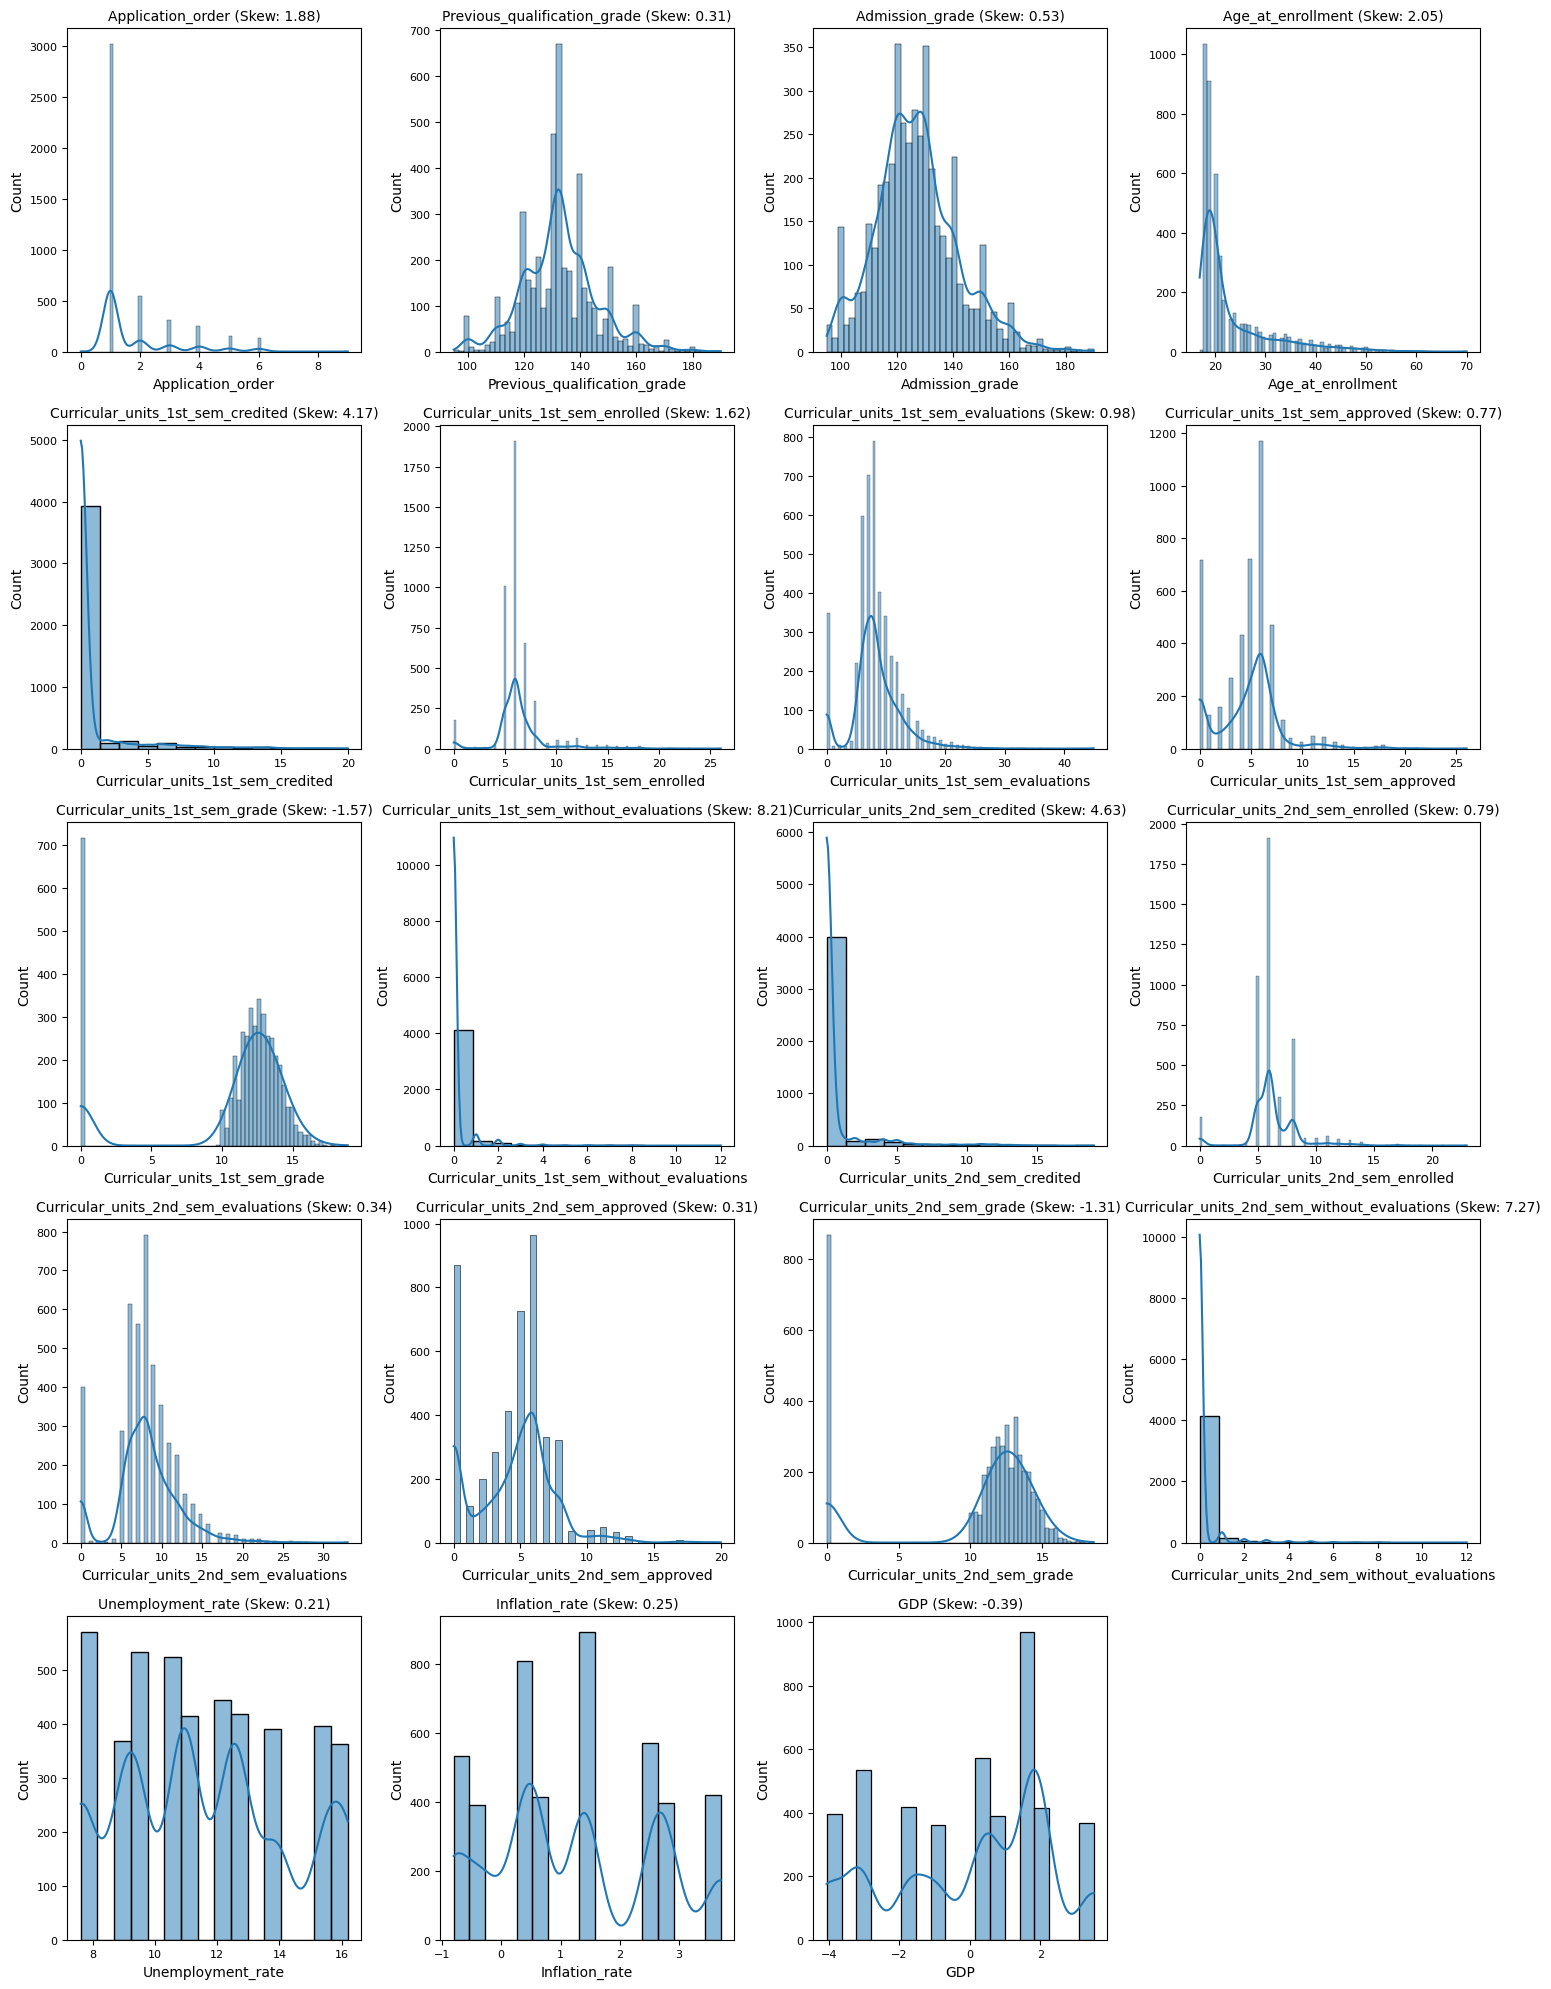

In [17]:
# Pilih hanya kolom numerik
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols = len(numerical_cols)
ncols = min(num_cols, 4)
nrows = (num_cols + ncols - 1) // ncols

# Figure dan Axes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'{col} (Skew: {df[col].skew():.2f})', fontsize=10)
    ax.tick_params(axis='both', labelsize=8)

if num_cols < len(axes):
    for j in range(num_cols, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Insight:

1. Application_order:

Potensi Skewness: Kemungkinan positif (kanan). Banyak mahasiswa mungkin masuk dengan pilihan pertama (0 atau nilai rendah), dan semakin sedikit yang masuk dengan pilihan yang lebih rendah (9). Hal ini menunjukkan bahwa sebagian besar mahasiswa berhasil masuk ke pilihan prioritas mereka, sementara hanya sedikit yang masuk ke pilihan terakhir.

2. Previous_qualification_grade & Admission_grade:

Potensi Skewness: Kemungkinan negatif (kiri). Kebanyakan mahasiswa yang diterima mungkin memiliki nilai yang cukup baik, dengan beberapa outlier yang nilainya jauh lebih rendah. Mayoritas mahasiswa memiliki performa akademik yang solid sebelum masuk, namun segelintir memiliki nilai yang jauh di bawah rata-rata.

3. Age_at_enrollment:

Potensi Skewness: Kemungkinan positif (kanan). Mayoritas mahasiswa mungkin berusia muda (misalnya 18-22 tahun), dengan sebagian kecil mahasiswa yang jauh lebih tua (non-tradisional). Jaya Jaya Institut sebagian besar menerima mahasiswa langsung dari sekolah menengah, dengan segelintir mahasiswa paruh waktu atau yang kembali kuliah di usia lebih matang.

4. Curricular_units_1st_sem_credited / enrolled / evaluations / approved / without_evaluations (untuk semester 1 & 2):

Potensi Skewness:

credited: Mungkin positif, jika kebanyakan mahasiswa tidak memiliki banyak kredit yang ditransfer, tapi ada beberapa yang memiliki banyak.

enrolled: Kemungkinan lebih simetris atau sedikit miring, karena banyak mahasiswa mengambil beban studi yang sama.

evaluations & approved: Bisa jadi negatif (kiri), jika sebagian besar mahasiswa melewati sebagian besar unit yang dievaluasi/disetujui, tetapi ada kelompok yang gagal banyak (maka nilainya rendah, menarik ekor ke kiri). Atau, bisa juga bimodal jika ada kelompok yang sukses dan kelompok yang gagal total.

without_evaluations: Kemungkinan sangat positif (kanan). Sebagian besar mahasiswa mungkin memiliki sedikit atau nol unit tanpa evaluasi, sementara sedikit yang memiliki banyak.

Insight: Variabel-variabel ini sangat penting untuk melihat kinerja akademik. Skewness yang signifikan (terutama pada grade, approved, without_evaluations) akan menyoroti kelompok mahasiswa yang berkinerja sangat buruk atau sangat baik.

5. Unemployment_rate, Inflation_rate, GDP:

Potensi Skewness: Cenderung lebih simetris atau sedikit miring tergantung pada variasi data ekonomi di wilayah asal mahasiswa. Fluktuasi ekonomi biasanya tidak ekstrem. Hal ini menunjukkan kondisi makroekonomi di latar belakang mahasiswa. Jika sangat miring, itu mungkin berarti sebagian besar mahasiswa berasal dari daerah dengan kondisi ekonomi yang sangat baik atau sangat buruk.

IDENTIFIKASI OUTLIER

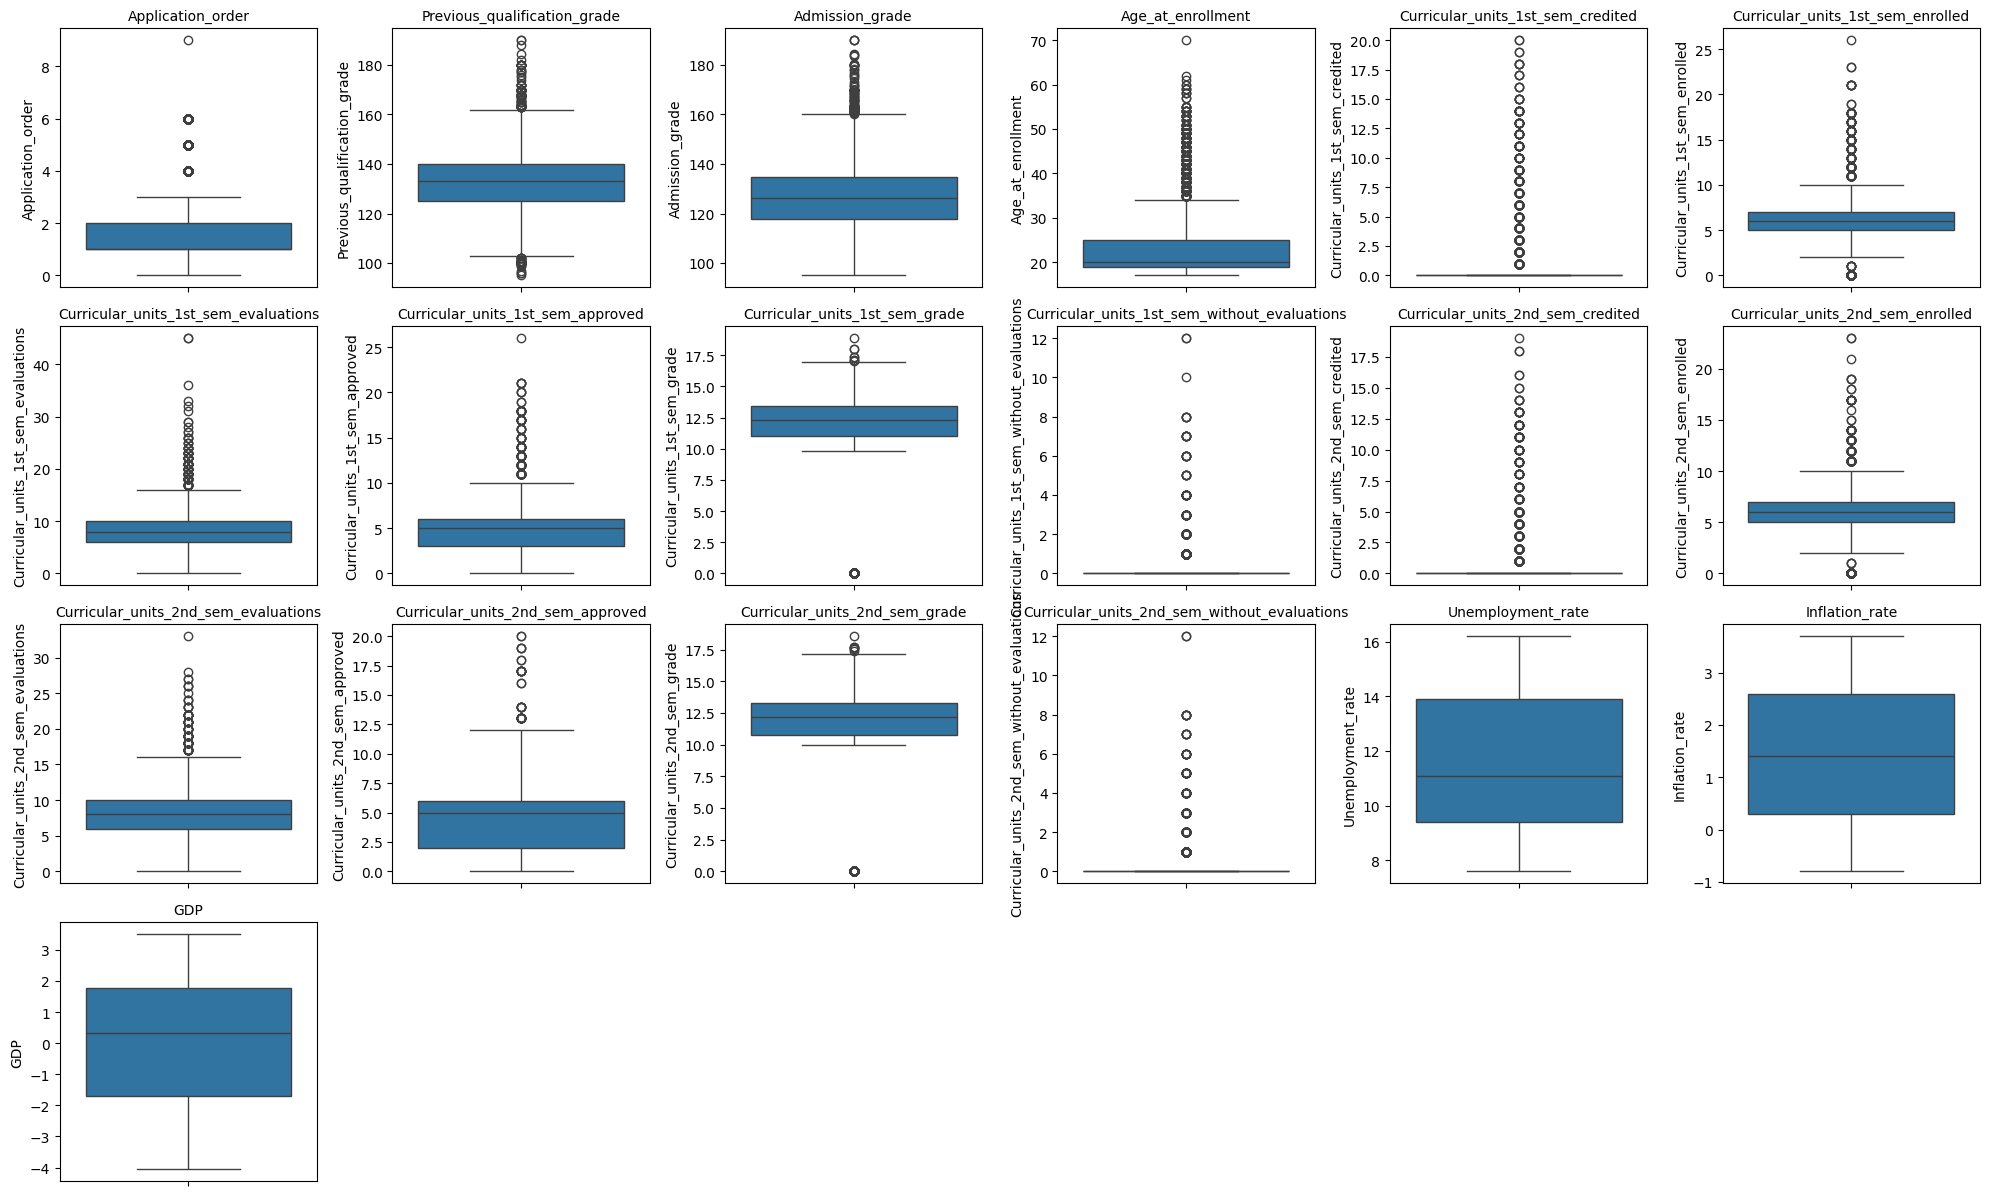

In [18]:
# Dapatkan semua kolom numerik
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Buat box plot untuk setiap kolom numerik
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 6, i)
    sns.boxplot(y=df[col])
    plt.title(col, fontsize=10)
    plt.tight_layout()

plt.show()

Insight :   

1. Application_order: Memiliki banyak outlier positif, menunjukkan ada beberapa aplikasi yang diajukan dengan urutan yang sangat tinggi. Mediannya cenderung rendah, mengindikasikan sebagian besar aplikasi diajukan pada urutan awal.
Previous_qualification_grade & Admission_grade: Keduanya menunjukkan sebaran nilai yang cukup merata dengan beberapa outlier di nilai yang lebih tinggi, mengindikasikan adanya beberapa kandidat dengan nilai kualifikasi/penerimaan yang sangat baik.

2. Age_at_enrollment: Terdapat banyak outlier positif, menunjukkan ada sejumlah kecil mahasiswa yang mendaftar pada usia yang jauh lebih tua dari mayoritas. Mediannya relatif rendah, menunjukkan sebagian besar mahasiswa adalah usia standar untuk masuk universitas.

3. Variabel Curricular_units (seperti _credited, _approved, _grade, _enrolled, _evaluations):
- Secara umum, semua variabel ini menunjukkan banyak outlier positif. Ini bisa berarti ada beberapa mahasiswa yang mengambil, menyelesaikan, atau dievaluasi untuk unit mata kuliah dalam jumlah yang jauh lebih banyak dibandingkan mayoritas.
- Mediannya cenderung rendah (seringkali di bawah 10 atau bahkan 0), mengindikasikan bahwa sebagian besar mahasiswa memiliki unit yang dikreditkan, disetujui, atau dievaluasi dalam jumlah yang relatif kecil, atau ada banyak nilai nol/tidak ada data untuk unit-unit tertentu bagi sebagian besar mahasiswa.
Khususnya Curricular_units_1st_sem_without_evaluations dan Curricular_units_2nd_sem_without_evaluations menunjukkan bahwa ada banyak mahasiswa yang memiliki unit mata kuliah tanpa evaluasi, dengan sebagian besar data terkumpul di nilai nol, dan hanya beberapa outlier di nilai yang lebih tinggi.

4. Unemployment_rate, Inflation_rate, GDP:
Variabel ekonomi ini cenderung memiliki sebaran yang lebih terkonsentrasi dibandingkan variabel lainnya, dengan kotak yang lebih kecil.
Unemployment_rate dan Inflation_rate menunjukkan distribusi yang relatif normal dengan beberapa outlier di nilai ekstrem.
GDP juga menunjukkan distribusi yang terkonsentrasi, dengan beberapa outlier.


Namun, outlier yang terjadi cukup memberikan kesimpulan pada keadaannya bukan berupa data yang salah atau aneh sehingga dapat diabaikan penanganannya.

#### EDA - Kolom Kategorikal

DIAGRAM BATANG KATEGORIKAL

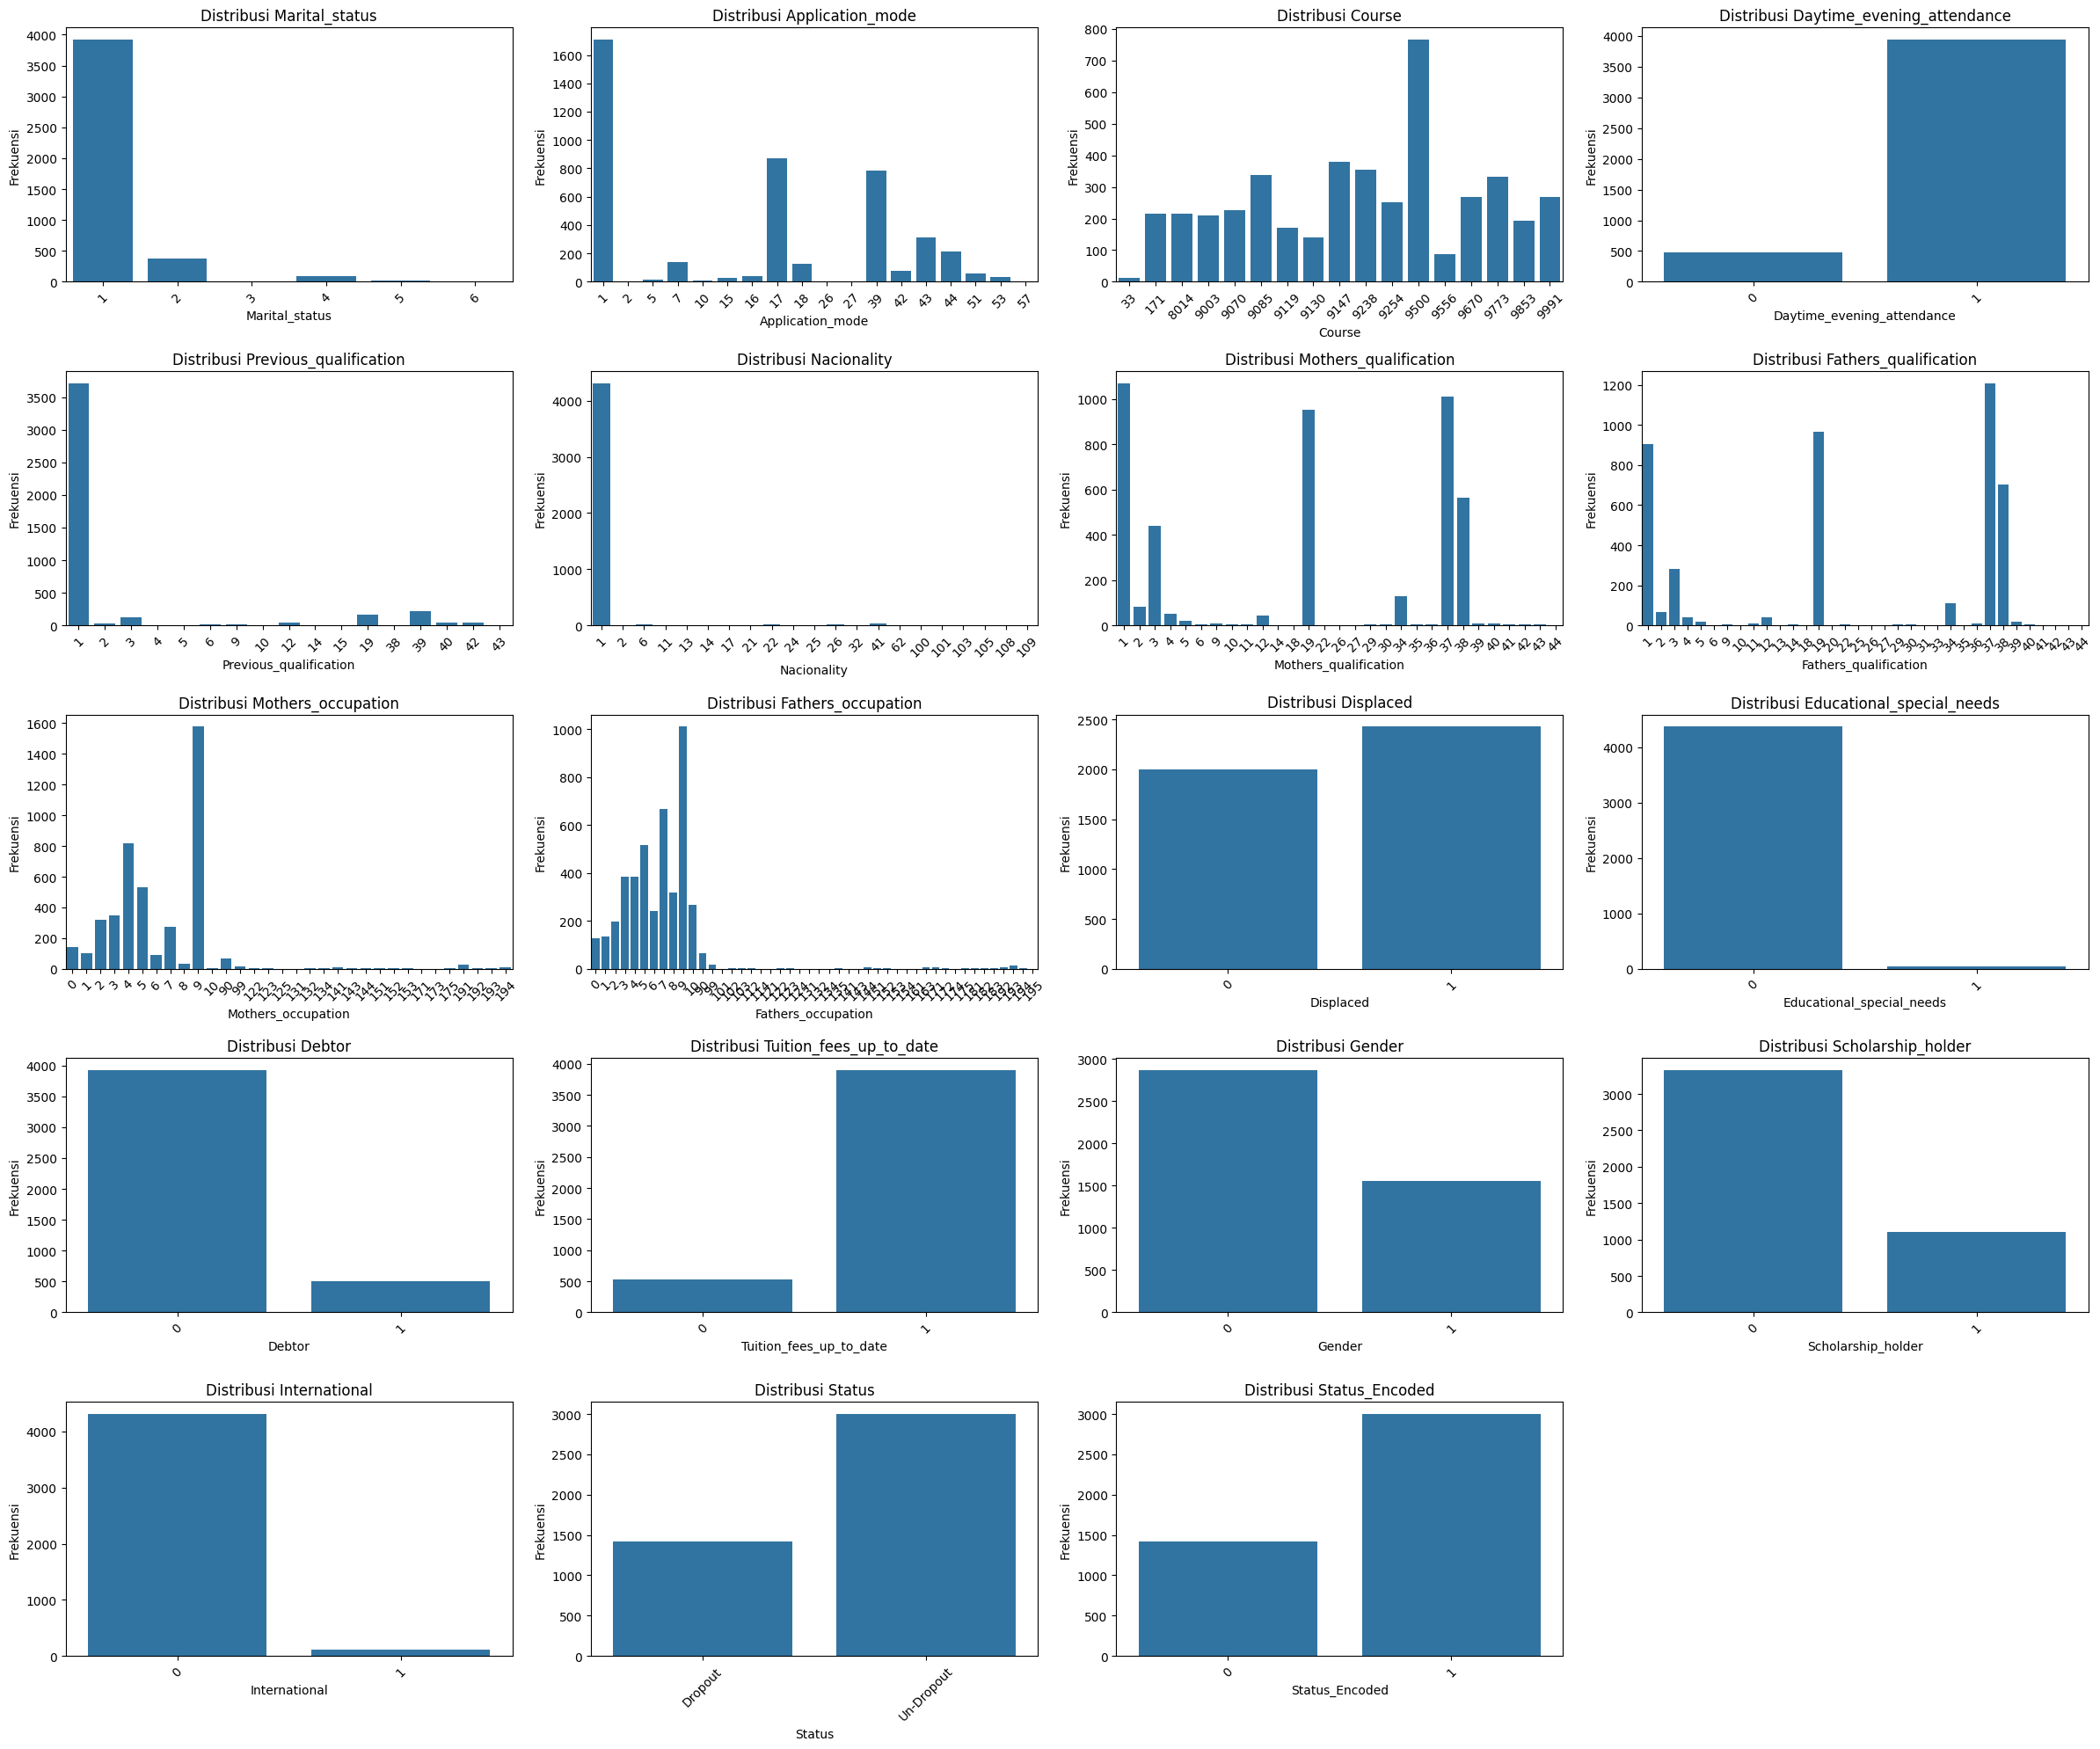

In [19]:
categorical_cols = df.select_dtypes(include='category').columns.tolist()

def plot_categorical_bar_charts(df, categorical_cols, cols_per_row=4):
    n_cols = len(categorical_cols)
    n_rows = int(np.ceil(n_cols / cols_per_row))

    fig, axes = plt.subplots(nrows=n_rows, ncols=cols_per_row, figsize=(cols_per_row * 6, n_rows * 4))

    for i, col in enumerate(categorical_cols):
        row_idx = i // cols_per_row
        col_idx = i % cols_per_row

        if n_rows > 1:
            ax = axes[row_idx, col_idx]
        else:
            ax = axes[col_idx]

        # Menghitung frekuensi setiap kategori
        counts = df[col].value_counts()
        sns.barplot(x=counts.index, y=counts.values, ax=ax)

        ax.set_title(f'Distribusi {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frekuensi')
        ax.tick_params(axis='x', rotation=45)  # Rotasi label x jika terlalu panjang

    # Hapus subplot kosong jika ada
    if n_cols < n_rows * cols_per_row:
        for j in range(n_cols, n_rows * cols_per_row):
            if n_rows > 1:
                fig.delaxes(axes.flatten()[j])
            else:
                fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan diagram batang dalam grid
plot_categorical_bar_charts(df, categorical_cols)

Insight :
Tentu, berikut adalah insight dari setiap grafik distribusi dalam format yang Anda minta:

* **Distribusi Marital_status:**
    * `Marital_status` terisi paling banyak oleh kategori **1 (Single)**.
    * `Marital_status` terisi paling sedikit oleh kategori **3 (Widower)**.

* **Distribusi Application_mode:**
    * `Application_mode` terisi paling banyak oleh kategori **1 (1st phase - general contingent)**.
    * `Application_mode` terisi paling sedikit oleh kategori **26 (Ordinance No. 533-A/99, item b2 (Different Plan)), 27 (Ordinance No. 533-A/99, item b3 (Other Institution)), 57(Change of institution/course (International))**.

* **Distribusi Course:**
    * `Course` terisi paling banyak oleh kategori **9500 (Nursing)**.
    * `Course` terisi paling sedikit oleh kategori **33 (Biofuel Production Technologies)**.

* **Distribusi Daytime_evening_attendance:**
    * `Daytime_evening_attendance` terisi paling banyak oleh kategori **1 (Daytime)**.
    * `Daytime_evening_attendance` terisi paling sedikit oleh kategori **0 (Evening)**.

* **Distribusi Previous_qualification:**
    * `Previous_qualification` terisi paling banyak oleh kategori **1 (Secondary Education)**.
    * `Previous_qualification` terisi paling sedikit oleh kategori **5 (Higher education - doctorate)** dan **14 (10th year of schooling)**.

* **Distribusi Nationality:**
    * `Nationality` terisi paling banyak oleh kategori **1 (Portuguese)**.
    * `Nationality` terisi paling sedikit oleh banyak kategori **13 (Dutch), 14 (English), 17 (Lithuanian), 32 (Turkish), 108 (Cuban), 109 (Colombian)**.

* **Distribusi Mothers_qualification:**
    * `Mothers_qualification` terisi paling banyak oleh kategori **1 ( Secondary Education - 12th Year of Schooling or Eq.)**.
    * `Mothers_qualification` terisi paling sedikit oleh kategori **44 (Higher Education - Doctorate (3rd cycle),27 (2nd cycle of the general high school course), 26 (7th year of schooling), 22 (Technical-professional course), 18 (General commerce course)**.

* **Distribusi Fathers_qualification:**
    * `Fathers_qualification` terisi paling banyak oleh kategori **37 (Basic education 1st cycle (4th/5th year) or equiv)**
    * `Fathers_qualification` terisi paling sedikit oleh kategori **44 (Higher Education - Doctorate (3rd cycle)), 42 (Professional higher technical course), 33 (Supplementary Accounting and Administration), 31 (General Course of Administration and Commerce), 27 (2nd cycle of the general high school course), 25 (Complementary High School Course - not concluded), 20 (Complementary High School Course), 18 (General commerce course), 13 (2nd year complementary high school course)**.

* **Distribusi Mothers_occupation:**
    * `Mothers_occupation` terisi paling banyak oleh kategori **9 (Unskilled Workers)**.
    * `Mothers_occupation` terisi paling sedikit oleh kategori **173 (Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like), 171 (Skilled construction workers and the like, except electricians), 131 (Intermediate level science and engineering technicians and professions), 125 (Specialists in information and communication technologies (ICT))**.

* **Distribusi Fathers_occupation:**
    * `Fathers_occupation` terisi paling banyak oleh kategori **9 (Unskilled Workers)**.
    * `Fathers_occupation` terisi paling sedikit oleh kategori **195, 174,161,154,153,143,141,134,132,131,124,121,114,101**.

* **Distribusi Displaced:**
    * `Displaced` terisi paling banyak oleh kategori **1 (Yes)**.
    * `Displaced` terisi paling sedikit oleh kategori **0 (No)**.

* **Distribusi Educational_special_needs:**
    * `Educational_special_needs` terisi paling banyak oleh kategori **0 (No)**.
    * `Educational_special_needs` terisi paling sedikit oleh kategori **1 (Yes)**.

* **Distribusi Debtor:**
    * `Debtor` terisi paling banyak oleh kategori **0 (No)**.
    * `Debtor` terisi paling sedikit oleh kategori **1 (Yes)**.

* **Distribusi Tuition_fees_up_to_date:**
    * `Tuition_fees_up_to_date` terisi paling banyak oleh kategori **1 (Yes)**.
    * `Tuition_fees_up_to_date` terisi paling sedikit oleh kategori **0 (No)**.

* **Distribusi Gender:**
    * `Gender` terisi paling banyak oleh kategori **1 (Female)**.
    * `Gender` terisi paling sedikit oleh kategori **0 (Male)**.

* **Distribusi Scholarship_holder:**
    * `Scholarship_holder` terisi paling banyak oleh kategori **0 (No)**.
    * `Scholarship_holder` terisi paling sedikit oleh kategori **1 (Yes)**.

* **Distribusi International:**
    * `International` terisi paling banyak oleh kategori **0 (No)**.
    * `International` terisi paling sedikit oleh kategori **1 (Yes)**.

* **Distribusi Status:** dan  **Distribusi Status_Encoded:**
    * `Status` dan `Status_Encoded` terisi paling banyak oleh kategori **2 (Graduate)**.
    * `Status` dan `Status_Encoded` terisi paling sedikit oleh kategori **1 (Enrolled)**.

DIAGRAM LINGKARAN (PERSENTASE) KATEGORIKAL

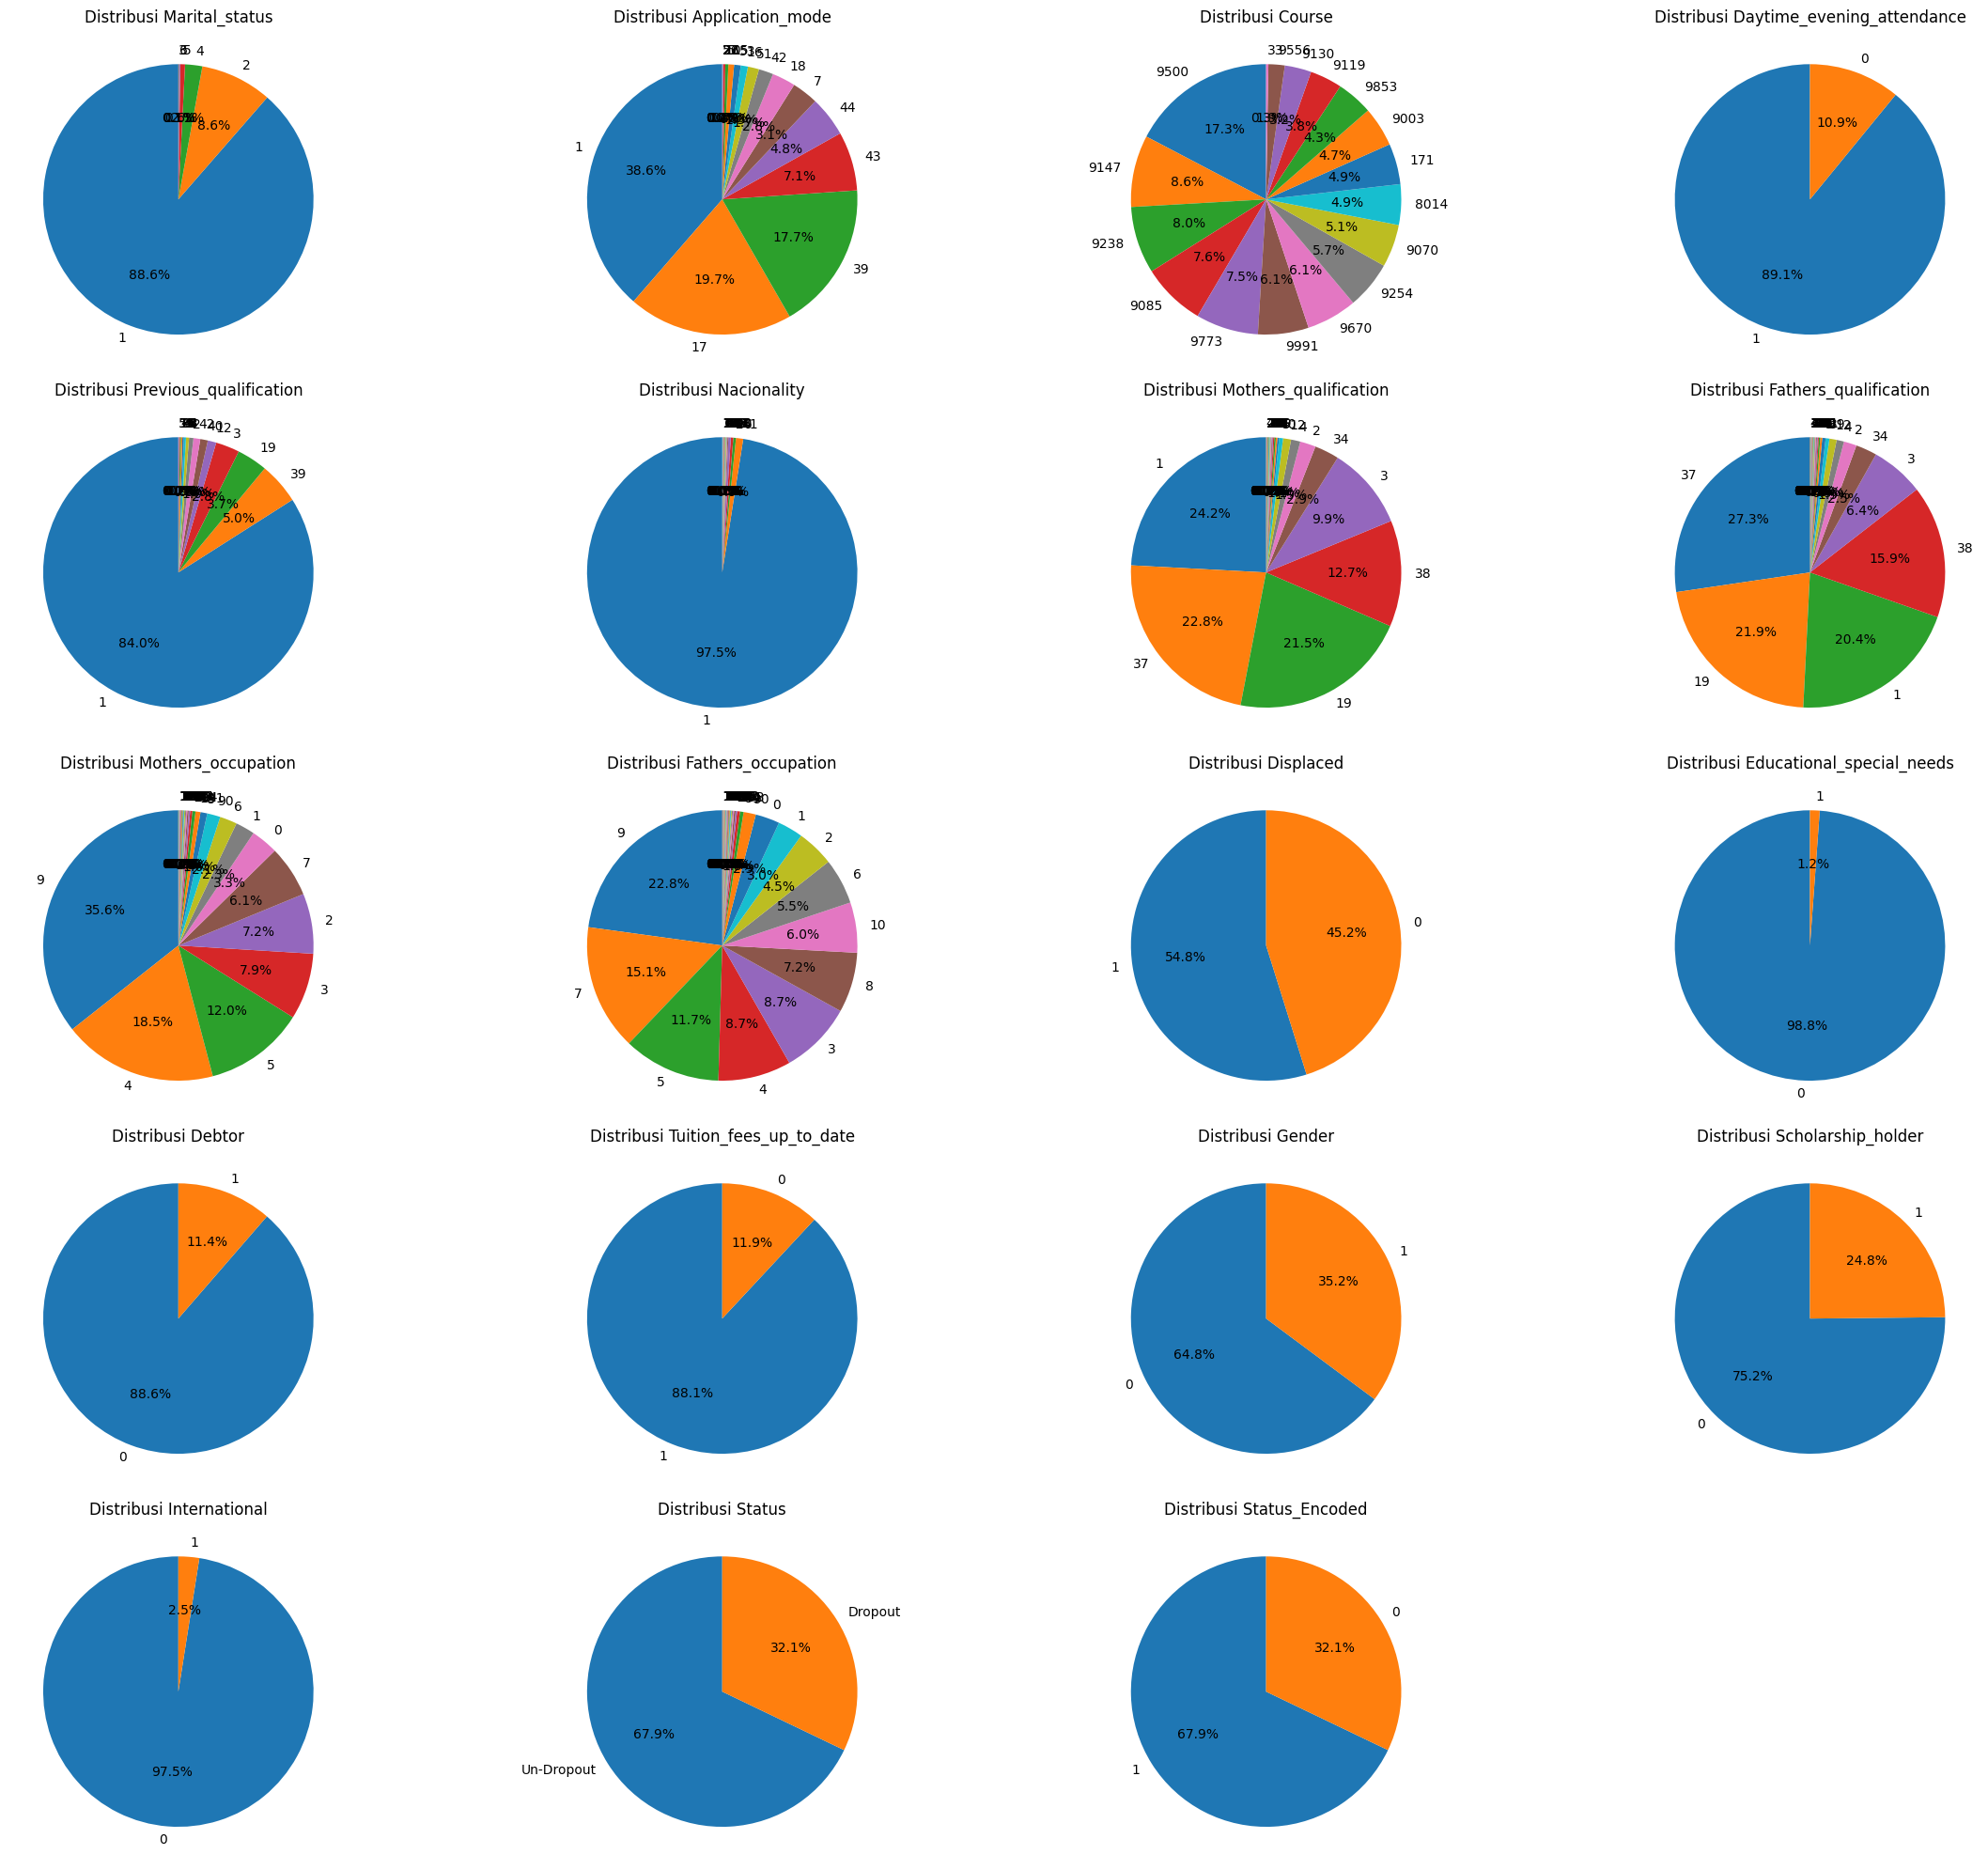

In [20]:
def plot_categorical_pie_charts(df, categorical_cols, cols_per_row=4):
    n_cols = len(categorical_cols)
    n_rows = int(np.ceil(n_cols / cols_per_row))

    fig, axes = plt.subplots(nrows=n_rows, ncols=cols_per_row, figsize=(cols_per_row * 6, n_rows * 4))

    for i, col in enumerate(categorical_cols):
        row_idx = i // cols_per_row
        col_idx = i % cols_per_row

        if n_rows > 1:
            ax = axes[row_idx, col_idx]
        else:
            ax = axes[col_idx]

        # Menghitung frekuensi setiap kategori
        counts = df[col].value_counts()
        labels = counts.index
        sizes = counts.values

        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'Distribusi {col}')

    # Hapus subplot kosong jika ada
    if n_cols < n_rows * cols_per_row:
        for j in range(n_cols, n_rows * cols_per_row):
            if n_rows > 1:
                fig.delaxes(axes.flatten()[j])
            else:
                fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan diagram pie dalam grid
plot_categorical_pie_charts(df, categorical_cols)

Insight yang dperoleh tidak jauh berbeda dengan DIAGRAM BATANG KATEGORIKAL

### Analisis Bivariate

#### EDA - Kolom Numerik

HEATMAP KORELASI NUMERIK

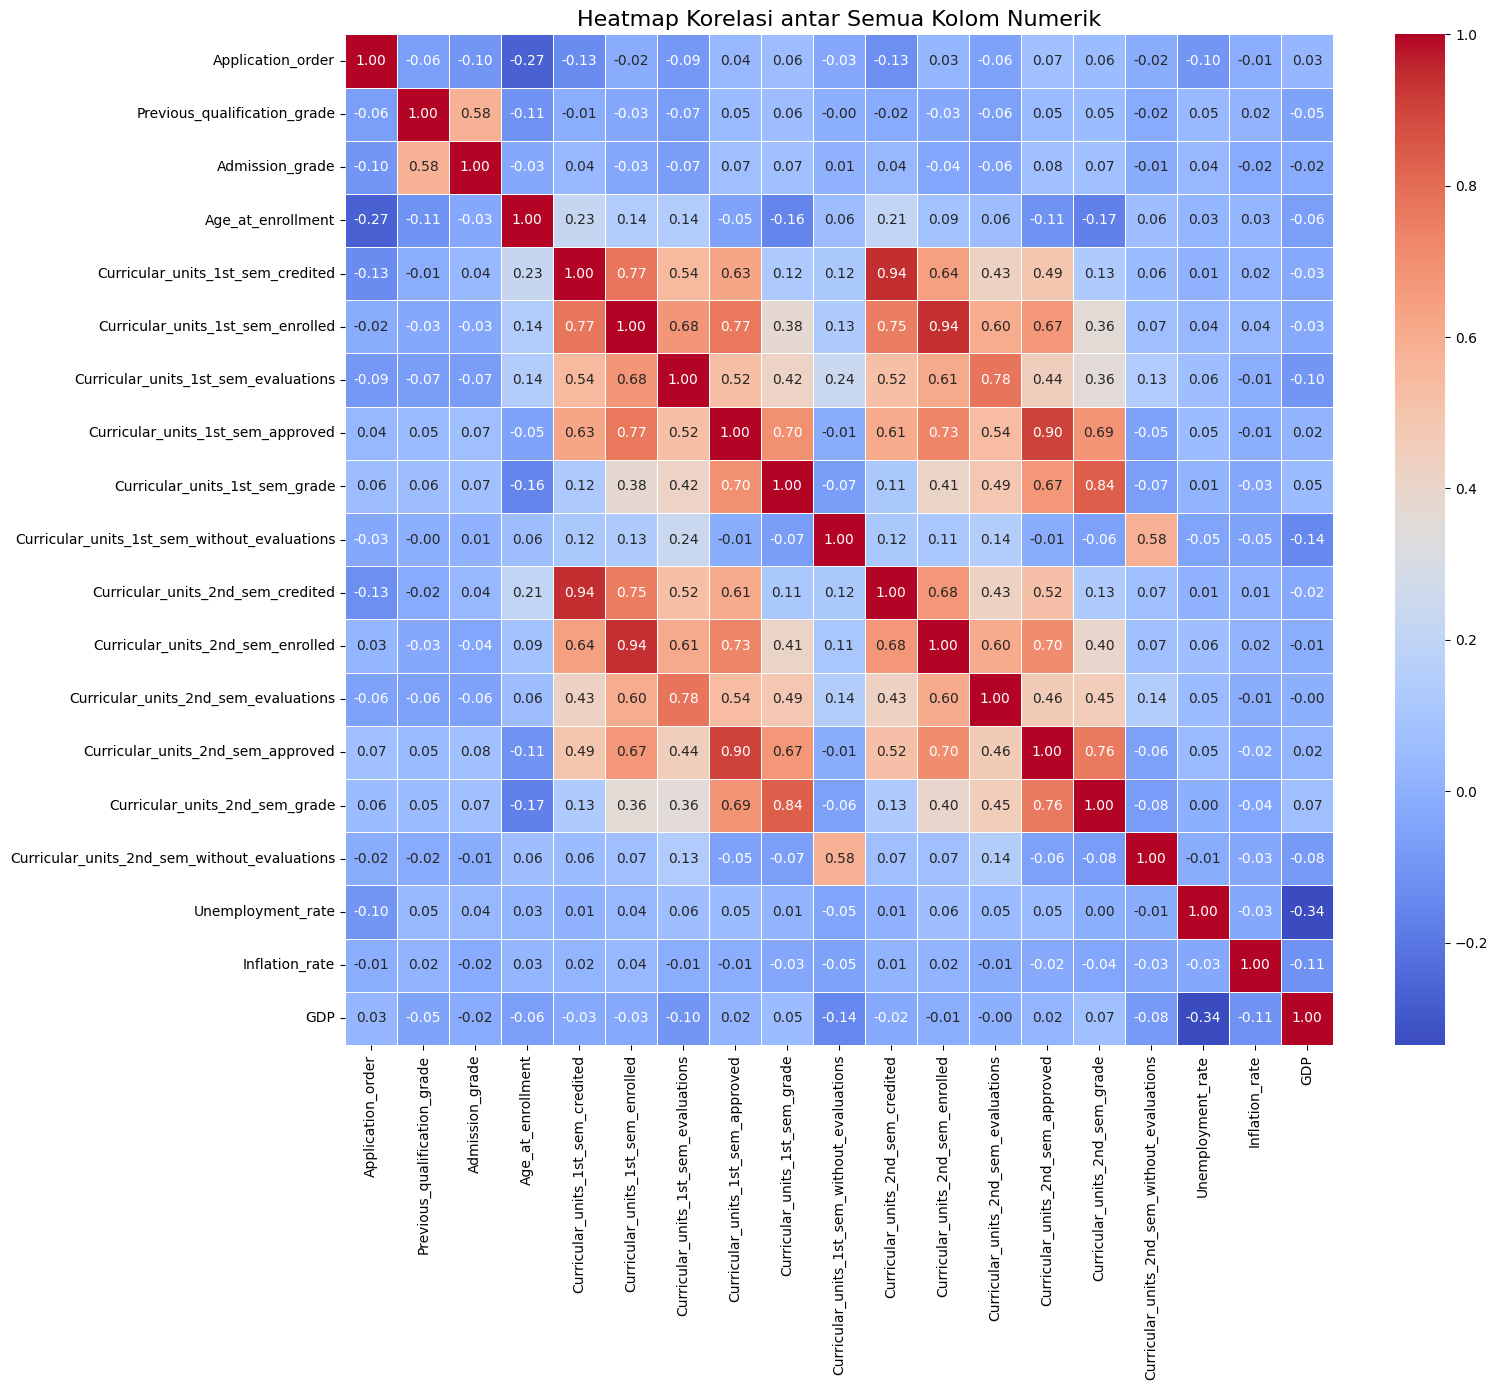

In [21]:
# Pilih hanya kolom numerik
numerical_cols = df.select_dtypes(include=np.number)

# Hitung matriks korelasi
correlation_matrix = numerical_cols.corr()

# Buat heatmap korelasi
plt.figure(figsize=(16, 14))  # Ukuran figure disesuaikan agar lebih luas
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi antar Semua Kolom Numerik', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Insight:

1. Korelasi Sangat Kuat (Merah Tua, nilai > 0.70):

- Antar Variabel Curricular_units (Semester 1 dan Semester 2): Ini adalah kelompok korelasi terkuat. Contohnya:
Curricular_units_1st_sem_enrolled dengan Curricular_units_1st_sem_approved, _credited, _evaluations, _grade.
Hal serupa terjadi untuk variabel Curricular_units di semester 2.
Ada juga korelasi kuat antara Curricular_units_1st_sem_grade dengan Curricular_units_1st_sem_approved dan _evaluations.

- Implikasi: Mahasiswa yang mendaftar banyak unit, cenderung menyelesaikan banyak unit, mendapatkan banyak kredit, dievaluasi banyak, dan bahkan mendapatkan nilai bagus di banyak unit tersebut. Ini adalah tren yang sangat konsisten.

2. Korelasi Sedang (Oranye/Kuning, nilai 0.30 - 0.70):

- Age_at_enrollment: Memiliki korelasi negatif sedang dengan sebagian besar variabel Curricular_units (misalnya _enrolled, _approved, _grade).
Implikasi: Semakin tua usia saat mendaftar, cenderung (sedikit) lebih sedikit unit yang diambil/disetujui/dinilai.

- Admission_grade: Memiliki korelasi positif sedang dengan beberapa variabel Curricular_units (misalnya _1st_sem_grade, _2nd_sem_grade).
Implikasi: Nilai masuk yang lebih tinggi cenderung berkorelasi dengan nilai mata kuliah yang lebih baik.

- Unemployment_rate dan Inflation_rate: Korelasi negatif sedang dengan GDP.
Implikasi: Tingkat pengangguran dan inflasi yang lebih tinggi cenderung berkorelasi dengan GDP yang lebih rendah, yang merupakan tren ekonomi standar.

3. Korelasi Lemah/Tidak Ada (Putih/Biru Muda, nilai < |0.30|):

- Application_order: Memiliki korelasi yang sangat lemah dengan hampir semua variabel, kecuali sedikit negatif dengan Age_at_enrollment.

- Previous_qualification_grade: Umumnya memiliki korelasi yang sangat lemah dengan banyak variabel Curricular_units.

- Banyak variabel lain juga memiliki korelasi yang sangat lemah satu sama lain, menunjukkan tidak ada hubungan linier yang jelas.

KOVARIANSI MATRIKS NUMERIK

In [22]:
# Pilih hanya kolom numerik (penting untuk kovariansi)
numerical_cols = df.select_dtypes(include=np.number)

# Hitung matriks kovariansi
covariance_matrix = numerical_cols.cov()

# Tampilkan matriks kovariansi
print("Matriks Kovariansi:\n", covariance_matrix)

Matriks Kovariansi:
                                               Application_order  \
Application_order                                      1.726052   
Previous_qualification_grade                          -1.117289   
Admission_grade                                       -1.844233   
Age_at_enrollment                                     -2.703090   
Curricular_units_1st_sem_credited                     -0.413559   
Curricular_units_1st_sem_enrolled                     -0.054767   
Curricular_units_1st_sem_evaluations                  -0.505979   
Curricular_units_1st_sem_approved                      0.144641   
Curricular_units_1st_sem_grade                         0.371050   
Curricular_units_1st_sem_without_evaluations          -0.028772   
Curricular_units_2nd_sem_credited                     -0.317127   
Curricular_units_2nd_sem_enrolled                      0.083314   
Curricular_units_2nd_sem_evaluations                  -0.285733   
Curricular_units_2nd_sem_approved        

**NUMERIKAL VS 'Status'**

Akan digunakan uji t-test karena dapat melakukan korelasi untuk data kategorikal biner dengan numerik dengan banyak data numerik.

In [23]:
def t_test_status_numerical(df, numerical_cols, status_col='Status_Encoded'):
    if status_col not in df.columns:
        print(f"Kolom '{status_col}' tidak ditemukan dalam DataFrame.")
        return

    status_values = df[status_col].unique()
    if len(status_values) != 2:
        print(f"Kolom '{status_col}' harus memiliki tepat dua kategori untuk t-test. Ditemukan: {status_values}")
        return

    group1 = df[df[status_col] == status_values[0]]
    group2 = df[df[status_col] == status_values[1]]

    print(f"Melakukan t-test antara '{status_col}' ({status_values[0]} vs {status_values[1]}) dan kolom numerik:\n")

    results = {}
    for col in numerical_cols:
        if col in df.columns:
            t_statistic, p_value = stats.ttest_ind(group1[col], group2[col], nan_policy='omit')
            results[col] = {'t_statistic': t_statistic, 'p_value': p_value}
            alpha = 0.05
            if p_value < alpha:
                significance = "signifikan"
            else:
                significance = "tidak signifikan"
            print(f"- {col}: t = {t_statistic:.3f}, p = {p_value:.3f} (Perbedaan rata-rata {significance})")
        else:
            print(f"- Kolom '{col}' tidak ditemukan dalam DataFrame.")

    return results


results_ttest = t_test_status_numerical(df.copy(), numerical_cols)
print(results_ttest)

Melakukan t-test antara 'Status_Encoded' (0 vs 1) dan kolom numerik:

- Application_order: t = -4.699, p = 0.000 (Perbedaan rata-rata signifikan)
- Previous_qualification_grade: t = -5.217, p = 0.000 (Perbedaan rata-rata signifikan)
- Admission_grade: t = -6.400, p = 0.000 (Perbedaan rata-rata signifikan)
- Age_at_enrollment: t = 17.479, p = 0.000 (Perbedaan rata-rata signifikan)
- Curricular_units_1st_sem_credited: t = -1.950, p = 0.051 (Perbedaan rata-rata tidak signifikan)
- Curricular_units_1st_sem_enrolled: t = -8.353, p = 0.000 (Perbedaan rata-rata signifikan)
- Curricular_units_1st_sem_evaluations: t = -6.018, p = 0.000 (Perbedaan rata-rata signifikan)
- Curricular_units_1st_sem_approved: t = -36.297, p = 0.000 (Perbedaan rata-rata signifikan)
- Curricular_units_1st_sem_grade: t = -36.451, p = 0.000 (Perbedaan rata-rata signifikan)
- Curricular_units_1st_sem_without_evaluations: t = 3.612, p = 0.000 (Perbedaan rata-rata signifikan)
- Curricular_units_2nd_sem_credited: t = -2.198

Adapun untuk kolom numerik dan 'status' sudah dilakukan pada analisis t-test numerik vs kategorikal biner sehingga sekarang perlu dilakukan penghapusan kolom yang tidak ada hubungan dengan 'Status'. Adapun yaitu :

[`Curricular_units_1st_sem_credited`,`Unemployment_rate`,`Inflation_rate`]

#### EDA - Kolom Kategorikal

In [24]:
def chi_square_test_all_categorical(df, categorical_cols):
    for col1, col2 in combinations(categorical_cols, 2):
        if col1 not in df.columns or col2 not in df.columns:
            print(f"Peringatan: Salah satu atau kedua kolom '{col1}' atau '{col2}' tidak ditemukan. Melewati pasangan ini.")
            continue  # Lewati pasangan kolom ini

        print(f"\n--- Uji Chi-Square antara '{col1}' dan '{col2}' ---")
        cross_tab = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, expected = chi2_contingency(cross_tab)

        print("Chi-Square Statistic:", chi2)
        print("P-value:", p)
        print("Degrees of Freedom:", dof)

        alpha = 0.05
        if p < alpha:
            print(f"Kesimpulan: Ada hubungan yang signifikan antara '{col1}' dan '{col2}'.")
        else:
            print(f"Kesimpulan: Tidak ada cukup bukti untuk menyimpulkan adanya hubungan antara '{col1}' dan '{col2}'.")

chi_square_test_all_categorical(df, categorical_cols)


--- Uji Chi-Square antara 'Marital_status' dan 'Application_mode' ---
Chi-Square Statistic: 1193.4874100633854
P-value: 5.360216518568887e-195
Degrees of Freedom: 85
Kesimpulan: Ada hubungan yang signifikan antara 'Marital_status' dan 'Application_mode'.

--- Uji Chi-Square antara 'Marital_status' dan 'Course' ---
Chi-Square Statistic: 697.7271649049796
P-value: 2.487516308134229e-99
Degrees of Freedom: 80
Kesimpulan: Ada hubungan yang signifikan antara 'Marital_status' dan 'Course'.

--- Uji Chi-Square antara 'Marital_status' dan 'Daytime_evening_attendance' ---
Chi-Square Statistic: 596.9250030935794
P-value: 9.338170725721476e-127
Degrees of Freedom: 5
Kesimpulan: Ada hubungan yang signifikan antara 'Marital_status' dan 'Daytime_evening_attendance'.

--- Uji Chi-Square antara 'Marital_status' dan 'Previous_qualification' ---
Chi-Square Statistic: 609.1475742122843
P-value: 2.1826170489513814e-82
Degrees of Freedom: 80
Kesimpulan: Ada hubungan yang signifikan antara 'Marital_status'

**KATEGORIKAL VS 'Status'**

Adapun untuk kolom kategorikal dan 'status' sudah dilakukan pada analisis Bivariate kategorikal vs kategorikal sehingga sekarang perlu dilakukan penghapusan kolom yang tidak ada hubungan dengan 'Status'. Adapun yaitu :

[`Nacionality`,`Educational_special_needs`,`International`]

### Drop Kolom yang tidak memiliki kaitan dengan kolom 'Status' atau 'Status Encoded'

In [25]:
# List of columns to drop
columns_to_drop = ['Nacionality', 'Educational_special_needs', 'International','Inflation_rate','Curricular_units_1st_sem_credited','Unemployment_rate']

# Drop the columns using the list
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [26]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Mothers_qualification,Fathers_qualification,Mothers_occupation,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,GDP,Status,Status_Encoded
0,1,17,5,171,1,1,122.0,19,12,5,...,0,0,0,0,0,0.000000,0,1.74,Dropout,0
1,1,15,1,9254,1,1,160.0,1,3,3,...,0,0,6,6,6,13.666667,0,0.79,Un-Dropout,1
2,1,1,5,9070,1,1,122.0,37,37,9,...,0,0,6,0,0,0.000000,0,1.74,Dropout,0
3,1,17,2,9773,1,1,122.0,38,37,5,...,0,0,6,10,5,12.400000,0,-3.12,Un-Dropout,1
4,2,39,1,8014,0,1,100.0,37,38,9,...,0,0,6,6,6,13.000000,0,0.79,Un-Dropout,1


## Modeling

### Pemilihan Target dan Fitur

In [27]:
target_var = ['Status_Encoded']
feature_var = ['Marital_status',
 'Application_mode',
 'Application_order',
 'Course',
 'Daytime_evening_attendance',
 'Previous_qualification',
 'Previous_qualification_grade',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Admission_grade',
 'Displaced',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'Age_at_enrollment',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_without_evaluations',
 'GDP']

### Ubah data menjadi numerik semua

In [28]:
gabungan_var = target_var + feature_var

In [29]:
def convert_to_int(df, gabungan_var):
    for col in gabungan_var:
        if col in df.columns:
            try:
                # Check if the column dtype is 'category' before converting
                if df[col].dtype.name == 'category':
                    df[col] = df[col].cat.codes # Convert category to numerical codes
                df[col] = df[col].astype(int)
            except ValueError:
                print(f"Tidak dapat mengubah kolom '{col}' menjadi int. Kolom '{col}' mungkin berisi data non-numerik setelah penanganan awal.")
        else:
            print(f"Kolom '{col}' tidak ditemukan dalam DataFrame.")

convert_to_int(df, gabungan_var)

print(df.dtypes)

Marital_status                                     int64
Application_mode                                   int64
Application_order                                  int64
Course                                             int64
Daytime_evening_attendance                         int64
Previous_qualification                             int64
Previous_qualification_grade                       int64
Mothers_qualification                              int64
Fathers_qualification                              int64
Mothers_occupation                                 int64
Fathers_occupation                                 int64
Admission_grade                                    int64
Displaced                                          int64
Debtor                                             int64
Tuition_fees_up_to_date                            int64
Gender                                             int64
Scholarship_holder                                 int64
Age_at_enrollment              

### Standarisasi

In [30]:
def standardize_data(df, feature_var, target_var='Status_Encoded'):
    X = df[feature_var]
    y = df[target_var]

    # Bagi data menjadi train dan test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi StandardScaler
    scaler = StandardScaler()

    # Fit scaler hanya pada data latih
    X_train_scaled = scaler.fit_transform(X_train)

    # Transformasikan data uji menggunakan scaler yang sama
    X_test_scaled = scaler.transform(X_test)

    # Ubah kembali ke DataFrame (opsional, tergantung kebutuhan Anda)
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

    return X_train_scaled_df, X_test_scaled_df, y_train, y_test

X_train_scaled, X_test_scaled, y_train, y_test = standardize_data(df.copy(), feature_var, target_var)

print("Data Latih yang Distandarisasi:")
print(X_train_scaled.head())
print("\nData Uji yang Distandarisasi:")
print(X_test_scaled.head())
print("\nTarget Latih:")
print(y_train.head())
print("\nTarget Uji:")
print(y_test.head())

Data Latih yang Distandarisasi:
      Marital_status  Application_mode  Application_order    Course  \
3383        4.769153         -0.552460          -0.557496 -0.198678   
2840       -0.294763          0.962870          -0.557496 -0.887562   
564        -0.294763         -1.120708           3.236694 -1.117190   
1786        1.393209          0.962870          -0.557496  0.030950   
3900       -0.294763         -1.120708           0.960180  0.490206   

      Daytime_evening_attendance  Previous_qualification  \
3383                     0.35848                0.132611   
2840                     0.35848               -0.379736   
564                      0.35848                0.901132   
1786                     0.35848                2.438174   
3900                     0.35848               -0.379736   

      Previous_qualification_grade  Mothers_qualification  \
3383                     -0.199166               0.087853   
2840                     -0.199166               1.086859 

### Pemilihan Model

In [31]:
# Inisialisasi model-model yang akan dicoba
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

results = {}

# Latih dan evaluasi setiap model
for name, model in models.items():
    # Latih model
    model.fit(X_train_scaled, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test_scaled)

    # Hitung akurasi
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Buat DataFrame untuk menampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])

# Cetak tabel hasil
print("\nPerbandingan Akurasi Model:")
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Perbandingan Akurasi Model:
                     Accuracy
Logistic Regression  0.857627
Random Forest        0.857627
XGBoost              0.850847


In [32]:
def tune_and_evaluate_random_forest(X_train, y_train, X_test, y_test):
    # Parameter yang akan di-tune
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    }

    # Inisialisasi GridSearchCV
    grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_grid=param_grid,
                               cv=3,
                               scoring='accuracy',
                               verbose=1,
                               n_jobs=-1)

    # Lakukan Grid Search pada data latih
    grid_search.fit(X_train, y_train)

    # Parameter terbaik
    best_params = grid_search.best_params_
    print("Parameter Terbaik:", best_params)

    # Model terbaik
    best_model = grid_search.best_estimator_

    # Lakukan prediksi pada data uji menggunakan model terbaik
    y_pred_best = best_model.predict(X_test)

    # Evaluasi model terbaik
    classification_rep = classification_report(y_test, y_pred_best, target_names=['Dropout', 'Un-Dropout'])
    confusion_mat = confusion_matrix(y_test, y_pred_best)
    accuracy = accuracy_score(y_test, y_pred_best)

    print("\nClassification Report Terbaik:")
    print(classification_rep)

    print("\nConfusion Matrix Terbaik:")
    print(confusion_mat)

    print(f"\nAkurasi Model Terbaik: {accuracy:.4f}")

    return best_model, best_params, classification_rep, confusion_mat, accuracy

# Panggil fungsi tuning dan evaluasi
best_model, best_params, classification_rep, confusion_mat, accuracy = tune_and_evaluate_random_forest(
    X_train_scaled, y_train, X_test_scaled, y_test
)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Parameter Terbaik: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Classification Report Terbaik:
              precision    recall  f1-score   support

     Dropout       0.88      0.71      0.78       316
  Un-Dropout       0.85      0.95      0.90       569

    accuracy                           0.86       885
   macro avg       0.87      0.83      0.84       885
weighted avg       0.86      0.86      0.86       885


Confusion Matrix Terbaik:
[[223  93]
 [ 31 538]]

Akurasi Model Terbaik: 0.8599


## Evaluation

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.88      0.71      0.78       316
  Un-Dropout       0.85      0.95      0.90       569

    accuracy                           0.86       885
   macro avg       0.87      0.83      0.84       885
weighted avg       0.86      0.86      0.86       885

Confusion Matrix:
 [[223  93]
 [ 31 538]]
Accuracy: 0.8598870056497175
AUC: 0.9112033102711842


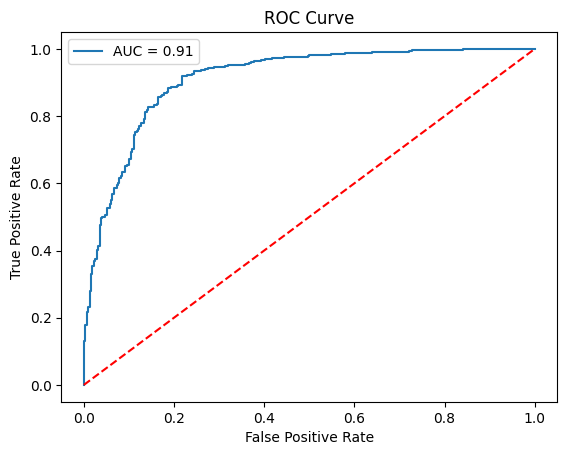

In [33]:
# Prediksi pada data uji yang telah diskalakan
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Evaluasi
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Dropout', 'Un-Dropout']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# ROC AUC
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

# Kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Garis acak
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Insight :    
Kurva ROC dengan AUC 0.91 ini adalah indikator kuat bahwa model klasifikasi yang dievaluasi sangat efektif dan memiliki kemampuan prediktif yang tinggi dalam membedakan antara dua kelas yang diamati. Ini adalah hasil yang sangat positif untuk model klasifikasi.

In [34]:
model = RandomForestClassifier().fit(X_train_scaled, y_train)
joblib.dump(model, 'student_performance_status.pkl')
print("Model berhasil disimpan sebagai 'model_prediksi_status.pkl'")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model berhasil disimpan sebagai 'model_prediksi_status.pkl'


In [35]:
! pip freeze > requirements.txt

## Persiapan Data Untuk Dashboard

In [36]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Mothers_qualification,Fathers_qualification,Mothers_occupation,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,GDP,Status,Status_Encoded
0,0,7,5,1,1,0,122,12,9,5,...,0,0,0,0,0,0,0,1,Dropout,0
1,0,5,1,10,1,0,160,0,2,3,...,0,0,6,6,6,13,0,0,Un-Dropout,1
2,0,0,5,4,1,0,122,21,26,9,...,0,0,6,0,0,0,0,1,Dropout,0
3,0,7,2,14,1,0,122,22,26,5,...,0,0,6,10,5,12,0,-3,Un-Dropout,1
4,1,11,1,2,0,0,100,21,27,9,...,0,0,6,6,6,13,0,0,Un-Dropout,1


In [37]:
df['Marital_status'] = df['Marital_status'].map({0:'Single', 1:'Married', 2:'Widower', 3:'Divorced', 4:'Facto Union', 5:'Legally Separated'})

In [38]:
df['Application_mode'] = df['Application_mode'].map({
    0: '1st phase - general contingent',
    1: 'Ordinance No. 612/93',
    2: '1st phase - special contingent (Azores Island)',
    3: 'Holders of other higher courses',
    4: 'Ordinance No. 854-B/99',
    5: 'International student (bachelor)',
    6: '1st phase - special contingent (Madeira Island)',
    7: '2nd phase - general contingent',
    8: '3rd phase - general contingent',
    9: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    10: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    11: 'Over 23 years old',
    12: 'Transfer',
    13: 'Change of course',
    14: 'Technological specialization diploma holders',
    15: 'Change of institution/course',
    16: 'Short cycle diploma holders',
    17: 'Change of institution/course (International)'
})

In [39]:
df['Course'] = df['Course'].map({
    0: 'Biofuel Production Technologies',
    1: 'Animation and Multimedia Design',
    2: 'Social Service (evening attendance)',
    3: 'Agronomy',
    4: 'Communication Design',
    5: 'Veterinary Nursing',
    6: 'Informatics Engineering',
    7: 'Equinculture',
    8: 'Management',
    9: 'Social Service',
    10: 'Tourism',
    11: 'Nursing',
    12: 'Oral Hygiene',
    13: 'Advertising and Marketing Management',
    14: 'Journalism and Communication',
    15: 'Basic Education',
    16: 'Management (evening attendance)'
})

In [40]:
df['Daytime_evening_attendance'] = df['Daytime_evening_attendance'].map({
    1: 'Daytime',
    0: 'Evening'
})

In [41]:
df['Previous_qualification'] = df['Previous_qualification'].map({
    0: 'Secondary education',
    1: "Higher education - bachelor's degree",
    2: 'Higher education - degree',
    3: "Higher education - master's",
    4: 'Higher education - doctorate',
    5: 'Frequency of higher education',
    6: '12th year of schooling - not completed',
    7: '11th year of schooling - not completed',
    8: 'Other - 11th year of schooling',
    9: '10th year of schooling',
    10: '10th year of schooling - not completed',
    11: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
    12: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
    13: 'Technological specialization course',
    14: 'Higher education - degree (1st cycle)',
    15: 'Professional higher technical course',
    16: 'Higher education - master (2nd cycle)'
})

In [42]:
df["Mothers_qualification"] = df["Mothers_qualification"].map({
    0: 'Secondary Education - 12th Year of Schooling or Eq.',
    1: "Higher Education - Bachelor's Degree",
    2: 'Higher Education - Degree',
    3: "Higher Education - Master's",
    4: 'Higher Education - Doctorate',
    5: 'Frequency of Higher Education',
    6: '12th Year of Schooling - Not Completed',
    7: '11th Year of Schooling - Not Completed',
    8: '7th Year (Old)',
    9: 'Other - 11th Year of Schooling',
    10: '10th Year of Schooling',
    11: 'General commerce course',
    12: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
    13: 'Technical-professional course',
    14: '7th year of schooling',
    15: '2nd cycle of the general high school course',
    16: '9th Year of Schooling - Not Completed',
    17: '8th year of schooling',
    18: 'Unknown',
    19: "Can't read or write",
    20: 'Can read without having a 4th year of schooling',
    21: 'Basic education 1st cycle (4th/5th year) or equiv.',
    22: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
    23: 'Technological specialization course',
    24: 'Higher education - degree (1st cycle)',
    25: 'Specialized higher studies course',
    26: 'Professional higher technical course',
    27: 'Higher Education - Master (2nd cycle)',
    28: 'Higher Education - Doctorate (3rd cycle)'
})

In [43]:
df["Fathers_qualification"] = df["Fathers_qualification"].map({
    0: 'Secondary Education - 12th Year of Schooling or Eq.',
    1: "Higher Education - Bachelor's Degree",
    2: 'Higher Education - Degree',
    3: "Higher Education - Master's",
    4: 'Higher Education - Doctorate',
    5: 'Frequency of Higher Education',
    6: '12th Year of Schooling - Not Completed',
    7: '11th Year of Schooling - Not Completed',
    8: '7th Year (Old)',
    9: 'Other - 11th Year of Schooling',
    10: '2nd year complementary high school course',
    11: '10th Year of Schooling',
    12: 'General commerce course',
    13: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
    14: 'Complementary High School Course',
    15: 'Technical-professional course',
    16: 'Complementary High School Course - not concluded',
    17: '7th year of schooling',
    18: '2nd cycle of the general high school course',
    19: '9th Year of Schooling - Not Completed',
    20: '8th year of schooling',
    21: 'General Course of Administration and Commerce',
    22: 'Supplementary Accounting and Administration',
    23: 'Unknown',
    24: "Can't read or write",
    25: 'Can read without having a 4th year of schooling',
    26: 'Basic education 1st cycle (4th/5th year) or equiv.',
    27: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
    28: 'Technological specialization course',
    29: 'Higher education - degree (1st cycle)',
    30: 'Specialized higher studies course',
    31: 'Professional higher technical course',
    32: 'Higher Education - Master (2nd cycle)',
    33: 'Higher Education - Doctorate (3rd cycle)'
})


In [44]:
df["Mothers_occupation"] = df["Mothers_occupation"].map({
    0: 'Student',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security and Safety Workers and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
    7: 'Skilled Workers in Industry, Construction and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    11: 'Other Situation',
    12: '(blank)',
    13: 'Health professionals',
    14: 'teachers',
    15: 'Specialists in information and communication technologies (ICT)',
    16: 'Intermediate level science and engineering technicians and professions',
    17: 'Technicians and professionals, of intermediate level of health',
    18: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
    19: 'Office workers, secretaries in general and data processing operators',
    20: 'Data, accounting, statistical, financial services and registry-related operators',
    21: 'Other administrative support staff',
    22: 'personal service workers',
    23: 'sellers',
    24: 'Personal care workers and the like',
    25: 'Skilled construction workers and the like, except electricians',
    26: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
    27: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    28: 'cleaning workers',
    29: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
    30: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
    31: 'Meal preparation assistants'
})


In [45]:
df["Fathers_occupation"] = df["Fathers_occupation"].map({
    0: 'Student',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security and Safety Workers and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
    7: 'Skilled Workers in Industry, Construction and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    11: 'Other Situation',
    12: '(blank)',
    13: 'Armed Forces Officers',
    14: 'Armed Forces Sergeants',
    15: 'Other Armed Forces personnel',
    16: 'Directors of administrative and commercial services',
    17: 'Hotel, catering, trade and other services directors',
    18: 'Specialists in the physical sciences, mathematics, engineering and related techniques',
    19: 'Health professionals',
    20: 'teachers',
    21: 'Specialists in finance, accounting, administrative organization, public and commercial relations',
    22: 'Intermediate level science and engineering technicians and professions',
    23: 'Technicians and professionals, of intermediate level of health',
    24: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
    25: 'Information and communication technology technicians',
    26: 'Office workers, secretaries in general and data processing operators',
    27: 'Data, accounting, statistical, financial services and registry-related operators',
    28: 'Other administrative support staff',
    29: 'personal service workers',
    30: 'sellers',
    31: 'Personal care workers and the like',
    32: 'Protection and security services personnel',
    33: 'Market-oriented farmers and skilled agricultural and animal production workers',
    34: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence',
    35: 'Skilled construction workers and the like, except electricians',
    36: 'Skilled workers in metallurgy, metalworking and similar',
    37: 'Skilled workers in electricity and electronics',
    38: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    39: 'Fixed plant and machine operators',
    40: 'assembly workers',
    41: 'Vehicle drivers and mobile equipment operators',
    42: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
    43: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
    44: 'Meal preparation assistants',
    45: 'Street vendors (except food) and street service providers'
})

In [46]:
df['Displaced'] = df['Displaced'].map({0:'No', 1:'Yes'})

In [47]:
df['Debtor'] = df['Debtor'].map({0:'No', 1:'Yes'})

In [48]:
df['Tuition_fees_up_to_date'] = df['Tuition_fees_up_to_date'].map({0:'No', 1:'Yes'})

In [49]:
df['Gender'] = df['Gender'].map({0:'Female', 1:'Male'})

In [50]:
df['Scholarship_holder'] = df['Scholarship_holder'].map({0:'No', 1:'Yes'})

In [51]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Mothers_qualification,Fathers_qualification,Mothers_occupation,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,GDP,Status,Status_Encoded
0,Single,2nd phase - general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,122,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",...,0,0,0,0,0,0,0,1,Dropout,0
1,Single,International student (bachelor),1,Tourism,Daytime,Secondary education,160,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,...,0,0,6,6,6,13,0,0,Un-Dropout,1
2,Single,1st phase - general contingent,5,Communication Design,Daytime,Secondary education,122,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,0,0,6,0,0,0,0,1,Dropout,0
3,Single,2nd phase - general contingent,2,Journalism and Communication,Daytime,Secondary education,122,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",...,0,0,6,10,5,12,0,-3,Un-Dropout,1
4,Married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,100,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,...,0,0,6,6,6,13,0,0,Un-Dropout,1


In [52]:
nama_file_csv = 'student_performance_result.csv'
df.to_csv(nama_file_csv, index=False)
print(f"DataFrame berhasil disimpan ke '{nama_file_csv}'")

DataFrame berhasil disimpan ke 'student_performance_result.csv'


In [53]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

nama_file = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[nama_file]))


print(df.head())

Saving student_performance_result.csv to student_performance_result (2).csv
User uploaded file "student_performance_result (2).csv" with length 1469917 bytes
  Marital_status                  Application_mode  Application_order  \
0         Single    2nd phase - general contingent                  5   
1         Single  International student (bachelor)                  1   
2         Single    1st phase - general contingent                  5   
3         Single    2nd phase - general contingent                  2   
4        Married                 Over 23 years old                  1   

                                Course Daytime_evening_attendance  \
0      Animation and Multimedia Design                    Daytime   
1                              Tourism                    Daytime   
2                 Communication Design                    Daytime   
3         Journalism and Communication                    Daytime   
4  Social Service (evening attendance)                    

In [55]:
def remove_no_status(df, status_col='Status', no_status_value='Un-Dropout'):
    if status_col not in df.columns:
        print(f"Kolom '{status_col}' tidak ditemukan dalam DataFrame.")
        return df

    df_filtered = df[df[status_col] != no_status_value]
    df_filtered = df_filtered.copy()

    print(f"Jumlah baris sebelum penghapusan: {len(df)}")
    print(f"Jumlah baris setelah penghapusan: {len(df_filtered)}")

    return df_filtered

df_status_only = remove_no_status(df.copy(), status_col='Status', no_status_value='Un-Dropout')

print("\nDataFrame yang hanya berisi mahasiswa yang di-Dropout:")
print(df_status_only)

Jumlah baris sebelum penghapusan: 4424
Jumlah baris setelah penghapusan: 1421

DataFrame yang hanya berisi mahasiswa yang di-Dropout:
     Marital_status                              Application_mode  \
0            Single                2nd phase - general contingent   
2            Single                1st phase - general contingent   
7            Single                3rd phase - general contingent   
9            Single                1st phase - general contingent   
12           Single                1st phase - general contingent   
...             ...                                           ...   
4408        Married                             Over 23 years old   
4411         Single  Technological specialization diploma holders   
4415       Divorced                             Over 23 years old   
4420         Single                1st phase - general contingent   
4421         Single                1st phase - general contingent   

      Application_order              

In [57]:
nama_file1_csv = 'student_performance_dropout.csv'
df_status_only.to_csv(nama_file1_csv, index=False)
print(f"DataFrame berhasil disimpan ke '{nama_file1_csv}'")

DataFrame berhasil disimpan ke 'student_performance_dropout.csv'
